In [1]:
  # Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib import cm

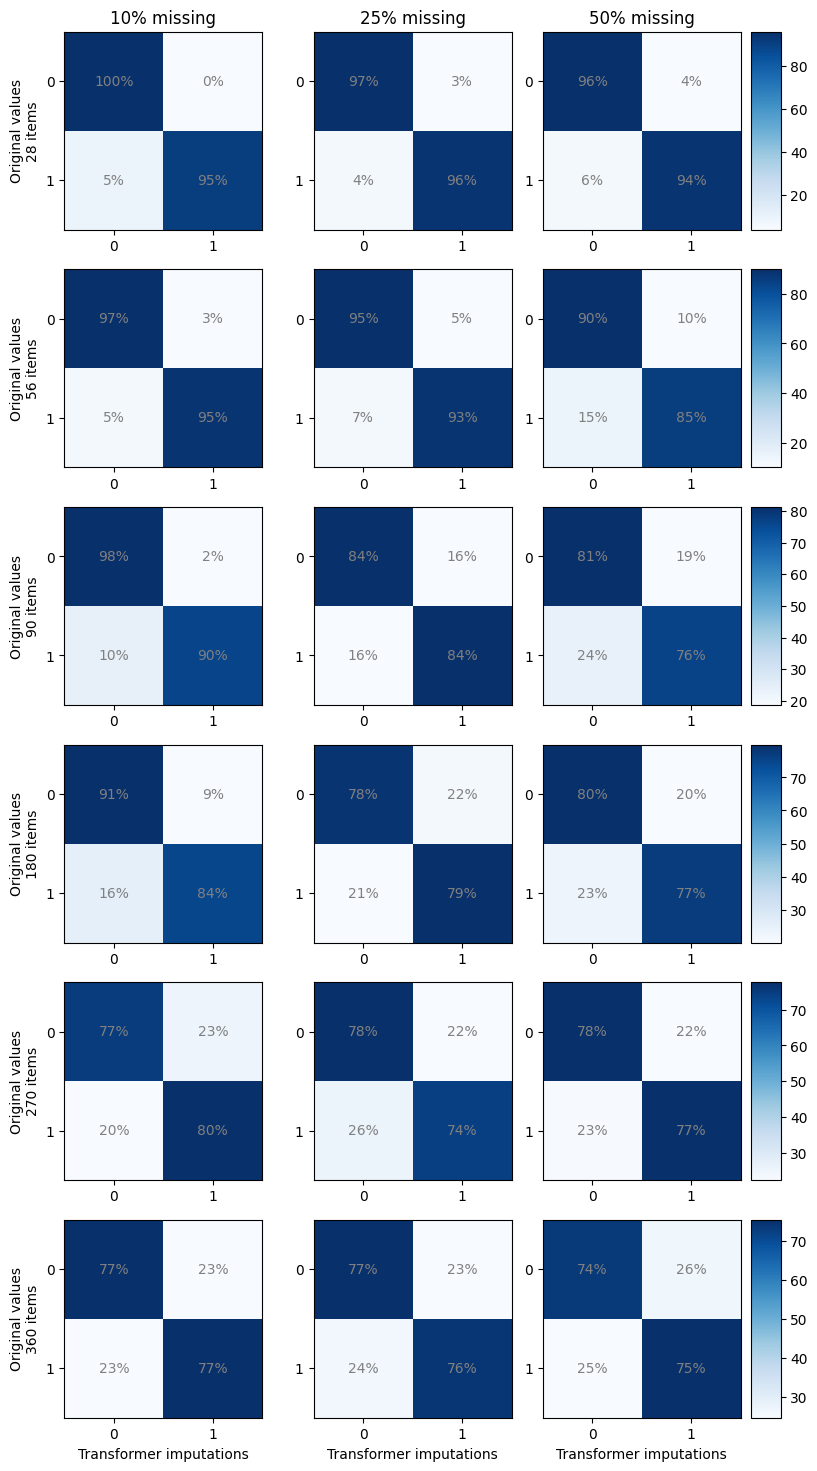

In [2]:
items = ['28', '56', '90', '180',  '270', '360']
missing = ['10', '25', '50']

fig, axs = plt.subplots(6, 3, figsize=(10, 18), gridspec_kw={'wspace': 0.01, 'hspace': 0.2})

for i in range(len(items)):
    for m in range(len(missing)):

        if int(items[i]) <= 56:
            dim = '3'
        else:
            dim = '21'

        original = pd.read_csv(dim + ' dimensions/' + items[i] + ' items/input_data/y/Yrep1.csv', sep=';', header=None)
        transformer = pd.read_csv(dim + ' dimensions/' + items[i] + ' items/output_data/' + missing[m] + '_missing/y/Y_rep1_transformer_' + missing[m] + '_missing.csv', sep=';', header=None)
        masked = pd.read_csv(dim + ' dimensions/' + items[i] + ' items/output_data/' + missing[m] + '_missing/masked/Masked_rep1_' + missing[m] + '_missing.csv', sep=';', header=None)

        original = original.values.reshape((int(items[i]), 10000)).transpose()

        trn = np.ones_like(transformer.values)
        trn[transformer.values < 0.5] = 0
        #print(trn)

        masked_indices = []

        for x in range(masked.shape[0]):
            b = []
            for y in range(masked.shape[1]):
                if masked.values[x,y] == -1:
                    b.append(y)
            masked_indices.append(b)

        masked_indices = np.array(masked_indices)

        mo = np.ndarray(masked_indices.shape)
        mt = np.ndarray(masked_indices.shape)

        orig = original[:8000, :]
        #print(orig.shape)

        for x in range(masked_indices.shape[0]):
            mo[x] = orig[x, :][masked_indices[x,:]]
            mt[x] = trn[x, :][masked_indices[x,:]]

        data = {'masked original': mo.flatten(), 'masked transformer': mt.flatten()}

        df = pd.DataFrame(data)

        #cm = pd.crosstab(df['masked original'], df['masked transformer'])
        cmp = pd.crosstab(df['masked original'], df['masked transformer']).apply(lambda s: (s/s.sum() * 100), axis=1)

        plt.subplots_adjust(right = 0.87)
        norm = Normalize(vmin = np.min(cmp.values.flatten()), vmax = np.max(cmp.values.flatten()))
        cmap = cm.Blues

        im = axs[i][m].imshow(cmp, norm=norm, cmap = cmap)

        if m == 2:
            divider = make_axes_locatable(axs[i][m])
            cax = divider.append_axes("right", size="15%", pad=0.1)
            cbar = plt.colorbar(im, cax = cax)

        if i == 0:
            axs[i][0].set_title('10% missing')
            axs[i][1].set_title('25% missing')
            axs[i][2].set_title('50% missing')

        if i == 5:
            axs[i][m].set_xlabel('Transformer imputations')

        if m == 0:
            axs[0][m].set_ylabel('Original values\n28 items')
            axs[1][m].set_ylabel('Original values\n56 items')
            axs[2][m].set_ylabel('Original values\n90 items')
            axs[3][m].set_ylabel('Original values\n180 items')
            axs[4][m].set_ylabel('Original values\n270 items')
            axs[5][m].set_ylabel('Original values\n360 items')
            
        axs[i][m].set_yticks([0, 1])
        axs[i][m].set_xticks([0, 1])

        for x in range(cmp.shape[0]):
            for y in range(cmp.shape[1]):
                text = im.axes.text(y, x, str(int(round(cmp.values[x, y]))) + '%', ha="center", va="center", color="gray")
        #if i == 0:
        #    disp.ax_.set_title(missing[m] + '% missing')
        #if m == 0:
        #    disp.ax_.set_title('Original Values')
        #if m == 5:
        #    disp.ax_.set_ylabel('Imputed Values')
        

#plt.tight_layout()
plt.subplots_adjust(right = 0.87)
plt.show()
        

Traceback (most recent call last):
  File "/Users/guilhermemendoncafreire/mambaforge/envs/ml/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_frame.py", line 987, in trace_dispatch
    self.do_wait_suspend(thread, frame, event, arg)
  File "/Users/guilhermemendoncafreire/mambaforge/envs/ml/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_frame.py", line 164, in do_wait_suspend
    self._args[0].do_wait_suspend(*args, **kwargs)
  File "/Users/guilhermemendoncafreire/mambaforge/envs/ml/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2062, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/Users/guilhermemendoncafreire/mambaforge/envs/ml/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2098, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

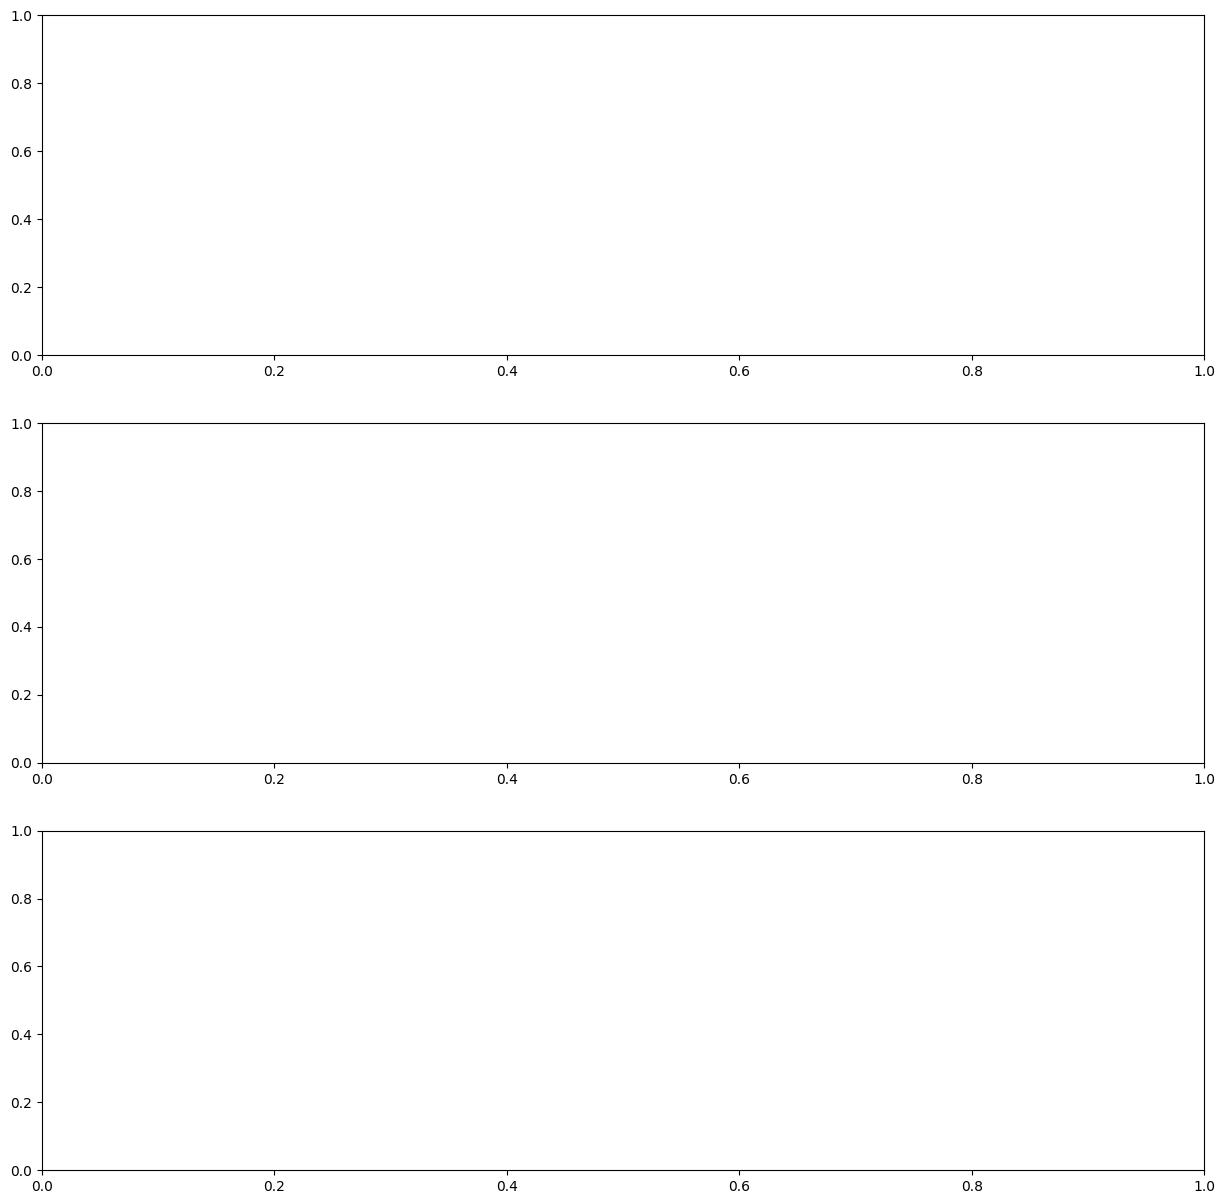

In [3]:
items = ['28', '56', '90', '180',  '270', '360']
missing = ['10', '25', '50']
stats = ['Recall', 'Specificity', 'Accuracy']

fig, axs = plt.subplots(3, 1, figsize=(15, 15))

#nb_group = [0, 1, 2]
spaces = [-0.2, -0.1, 0., 0.1, 0.2, 0.3]
colors = ['firebrick', 'darkorange', 'gold', 'forestgreen', 'royalblue', 'rebeccapurple']

scale = np.arange(len(stats))  # the label locations
width = 0.1  # the width of the bars

for m in range(len(missing)):
    d = {}
    for i in range(len(items)):

        l = []

        if int(items[i]) <= 56:
            dim = '3'
        else:
            dim = '21'

        original = pd.read_csv(dim + ' dimensions/' + items[i] + ' items/input_data/y/Yrep1.csv', sep=';', header=None)
        transformer = pd.read_csv(dim + ' dimensions/' + items[i] + ' items/output_data/' + missing[m] + '_missing/y/Y_rep1_transformer_' + missing[m] + '_missing.csv', sep=';', header=None)
        masked = pd.read_csv(dim + ' dimensions/' + items[i] + ' items/output_data/' + missing[m] + '_missing/masked/Masked_rep1_' + missing[m] + '_missing.csv', sep=';', header=None)

        original = original.values.reshape((int(items[i]), 10000)).transpose()

        trn = np.ones_like(transformer.values)
        trn[transformer.values < 0.5] = 0
        #print(trn)

        masked_indices = []

        for x in range(masked.shape[0]):
            b = []
            for y in range(masked.shape[1]):
                if masked.values[x,y] == -1:
                    b.append(y)
            masked_indices.append(b)

        masked_indices = np.array(masked_indices)

        mo = np.ndarray(masked_indices.shape)
        mt = np.ndarray(masked_indices.shape)

        orig = original[:8000, :]
        #print(orig.shape)

        for x in range(masked_indices.shape[0]):
            mo[x] = orig[x, :][masked_indices[x,:]]
            mt[x] = trn[x, :][masked_indices[x,:]]

        data.clear()
        data = {'masked original': mo.flatten(), 'masked transformer': mt.flatten()}

        #dfdata = pd.DataFrame(data)

        #cm = pd.crosstab(df['masked original'], df['masked transformer'])
        cmp = pd.crosstab(data['masked original'], data['masked transformer']).apply(lambda s: (s/s.sum() * 100), axis=1)

        tp = cmp[1][1]
        tn = cmp[0][0]
        fp = cmp[0][1]
        fn = cmp[1][0]

        l.append(round(tp/(tp+fn), 2))
        l.append(round(tn/(fp+tn), 2))
        l.append(round((tp+tn)/(tp+tn+fp+fn), 2))

        d[items[i]] = l

    multiplier = 0
    for att, meas in d.items():
        #offset = width * multiplier
        rects = axs[m].bar(scale + spaces[multiplier], meas, width, color=colors[multiplier], label=(att + ' items'))
        axs[m].bar_label(rects, padding=3)
        axs[m].set_xticks(scale, stats)
        axs[m].spines['top'].set_visible(False)
        axs[m].spines['right'].set_visible(False)
        axs[m].legend(loc='upper center', ncols=6)
        axs[m].set_ylim(0.0, 1.2)
        axs[m].set_title(missing[m] + '% missing')
        multiplier += 1



# Scatter Plots

## Discriminations 28x3

In [4]:
# Discriminations
a_values = pd.read_csv('3 dimensions/28 items/input_data/a/a_values.csv', sep=';', header=None)
a_10x28 = pd.read_csv('3 dimensions/28 items/output_data/10_missing/a/discr_hat_rep1_transformer_10_missing_TRANSPOSED.csv', sep=';', header=None)
a_25x28 = pd.read_csv('3 dimensions/28 items/output_data/25_missing/a/discr_hat_rep1_transformer_25_missing_TRANSPOSED.csv', sep=';', header=None)
a_50x28 = pd.read_csv('3 dimensions/28 items/output_data/50_missing/a/discr_hat_rep1_transformer_50_missing_TRANSPOSED.csv', sep=';', header=None)

a_10x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/10_missing/a/discr_hat_rep1_jml_10_missing_2.csv', sep=';', header=None).values.transpose().flatten()
a_10x28_jml = a_10x28_jml[a_10x28_jml != 0.0]
a_25x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/25_missing/a/discr_hat_rep1_jml_25_missing_2.csv', sep=';', header=None).values.transpose().flatten()
a_25x28_jml = a_25x28_jml[a_25x28_jml != 0.0]
a_50x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/50_missing/a/discr_hat_rep1_jml_50_missing_2.csv', sep=';', header=None).values.transpose().flatten()
a_50x28_jml = a_50x28_jml[a_50x28_jml != 0.0]

a_10x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/10_missing/a/discr_hat_rep1_mhrm_10_missing.csv', sep=';', header=None)
a_25x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/25_missing/a/discr_hat_rep1_mhrm_25_missing.csv', sep=';', header=None)
a_50x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/50_missing/a/discr_hat_rep1_mhrm_50_missing.csv', sep=';', header=None)

Text(0.5, 0.93, 'Discriminations')

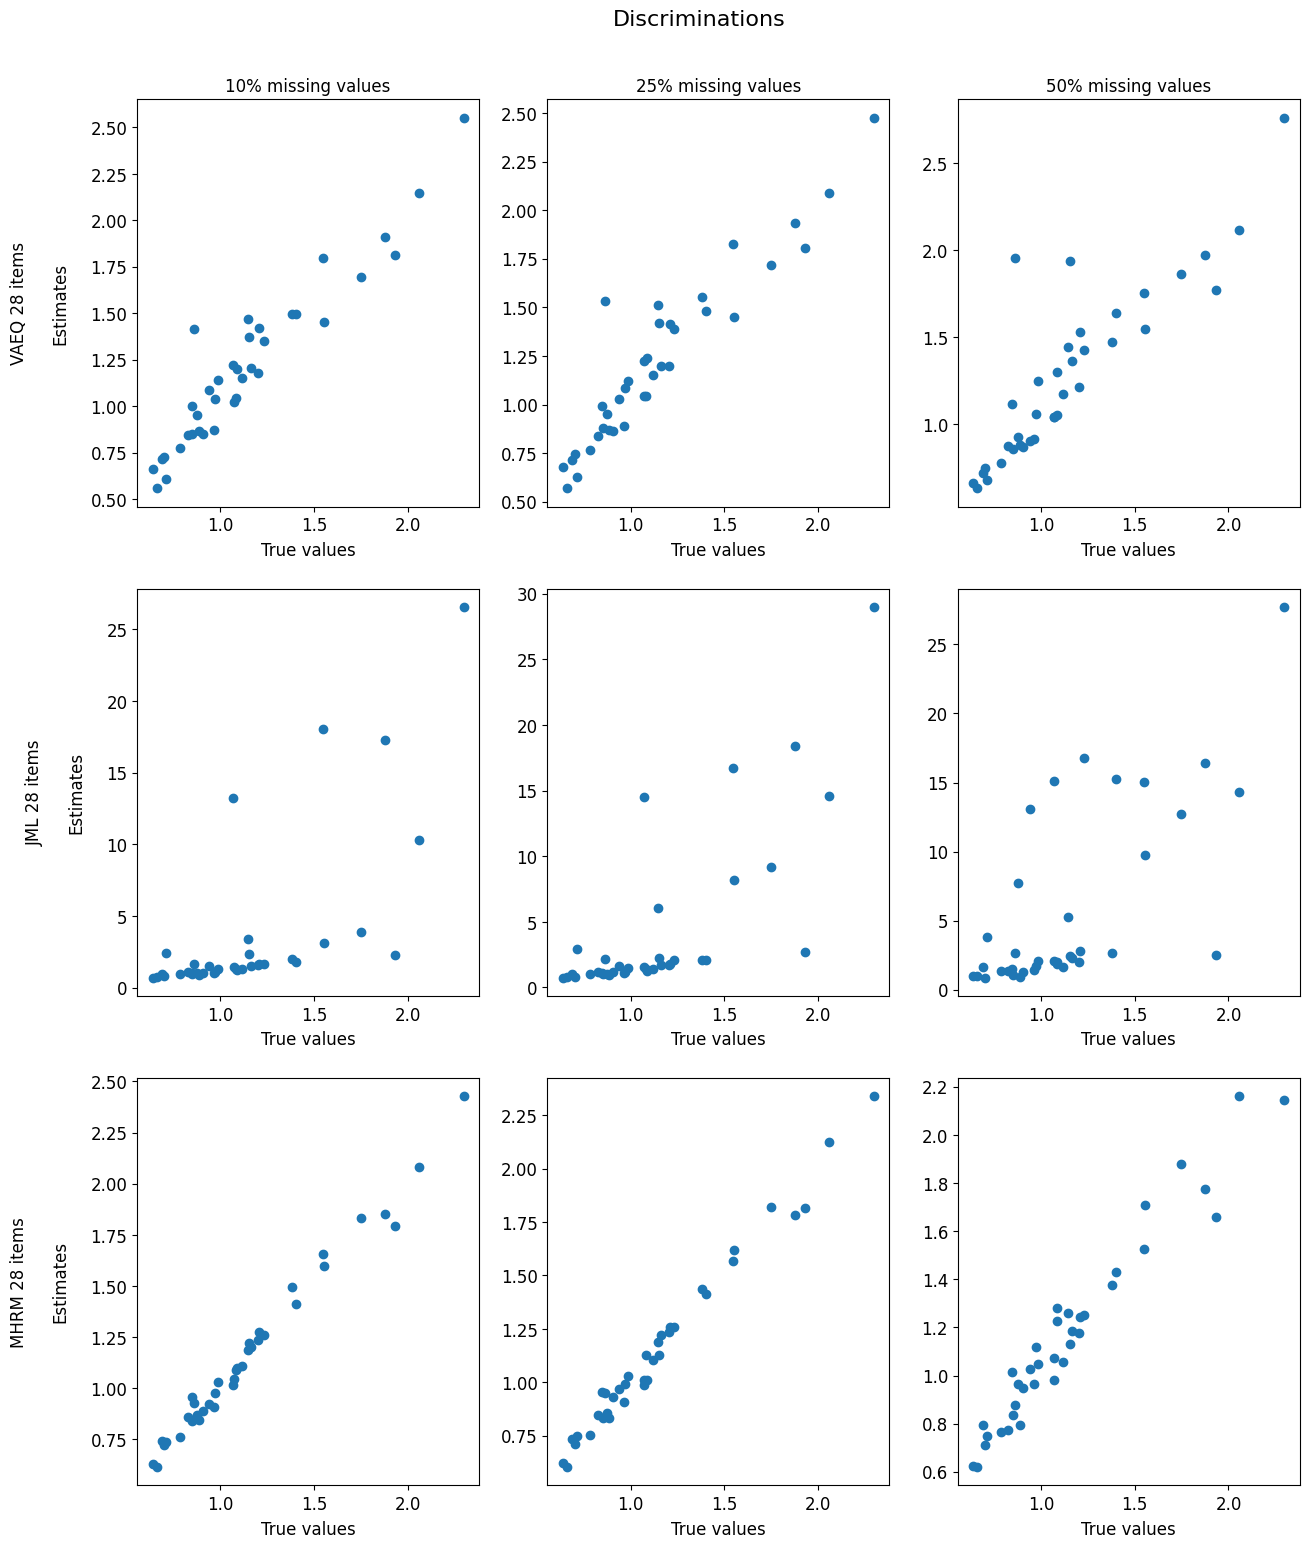

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(15, 18))


labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

# 1st column
axs[0, 0].scatter(a_values, a_10x28)
axs[0, 0].tick_params(axis='x', labelsize=labelsize)
axs[0, 0].tick_params(axis='y', labelsize=labelsize)
axs[0, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 0].scatter(a_values, a_10x28_jml)
axs[1, 0].tick_params(axis='x', labelsize=labelsize)
axs[1, 0].tick_params(axis='y', labelsize=labelsize)
axs[1, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 0].scatter(a_values, a_10x28_mhrm)
axs[2, 0].tick_params(axis='x', labelsize=labelsize)
axs[2, 0].tick_params(axis='y', labelsize=labelsize)
axs[2, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# 2nd column
axs[0, 1].scatter(a_values, a_25x28)
axs[0, 1].tick_params(axis='x', labelsize=labelsize)
axs[0, 1].tick_params(axis='y', labelsize=labelsize)
axs[0, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 1].scatter(a_values, a_25x28_jml)
axs[1, 1].tick_params(axis='x', labelsize=labelsize)
axs[1, 1].tick_params(axis='y', labelsize=labelsize)
axs[1, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 1].scatter(a_values, a_25x28_mhrm)
axs[2, 1].tick_params(axis='x', labelsize=labelsize)
axs[2, 1].tick_params(axis='y', labelsize=labelsize)
axs[2, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# 3rd column
axs[0, 2].scatter(a_values, a_50x28)
axs[0, 2].tick_params(axis='x', labelsize=labelsize)
axs[0, 2].tick_params(axis='y', labelsize=labelsize)
axs[0, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 2].scatter(a_values, a_50x28_jml)
axs[1, 2].tick_params(axis='x', labelsize=labelsize)
axs[1, 2].tick_params(axis='y', labelsize=labelsize)
axs[1, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 2].scatter(a_values, a_50x28_mhrm)
axs[2, 2].tick_params(axis='x', labelsize=labelsize)
axs[2, 2].tick_params(axis='y', labelsize=labelsize)
axs[2, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# Format axes labels
axs[0, 0].set_ylabel('VAEQ 28 items\n\nEstimates', **label_fmt)
axs[1, 0].set_ylabel('JML 28 items\n\nEstimates', **label_fmt)
axs[2, 0].set_ylabel('MHRM 28 items\n\nEstimates', **label_fmt)

axs[0, 0].set_title('10% missing values')
axs[0, 1].set_title('25% missing values')
axs[0, 2].set_title('50% missing values')

fig.suptitle('Discriminations', y=0.93, fontsize=16)



## Difficulties 28x3

In [6]:
# Difficulties
b_values = pd.read_csv('3 dimensions/28 items/input_data/b/b_values.csv', sep=';', header=None)
b_10x28 = pd.read_csv('3 dimensions/28 items/output_data/10_missing/b/diff_rep1_transformer_10_missing.csv', sep=';', header=None)
b_25x28 = pd.read_csv('3 dimensions/28 items/output_data/25_missing/b/diff_rep1_transformer_25_missing.csv', sep=';', header=None)
b_50x28 = pd.read_csv('3 dimensions/28 items/output_data/50_missing/b/diff_rep1_transformer_50_missing.csv', sep=';', header=None)

b_10x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/10_missing/b/diff_hat_rep1_jml_10_missing_2.csv', sep=';', header=None)
b_25x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/25_missing/b/diff_hat_rep1_jml_25_missing_2.csv', sep=';', header=None)
b_50x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/50_missing/b/diff_hat_rep1_jml_50_missing_2.csv', sep=';', header=None)

b_10x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/10_missing/b/diff_hat_rep1_mhrm_10_missing.csv', sep=';', header=None)
b_25x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/25_missing/b/diff_hat_rep1_mhrm_25_missing.csv', sep=';', header=None)
b_50x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/50_missing/b/diff_hat_rep1_mhrm_50_missing.csv', sep=';', header=None)

Text(0.5, 0.93, 'Difficulties')

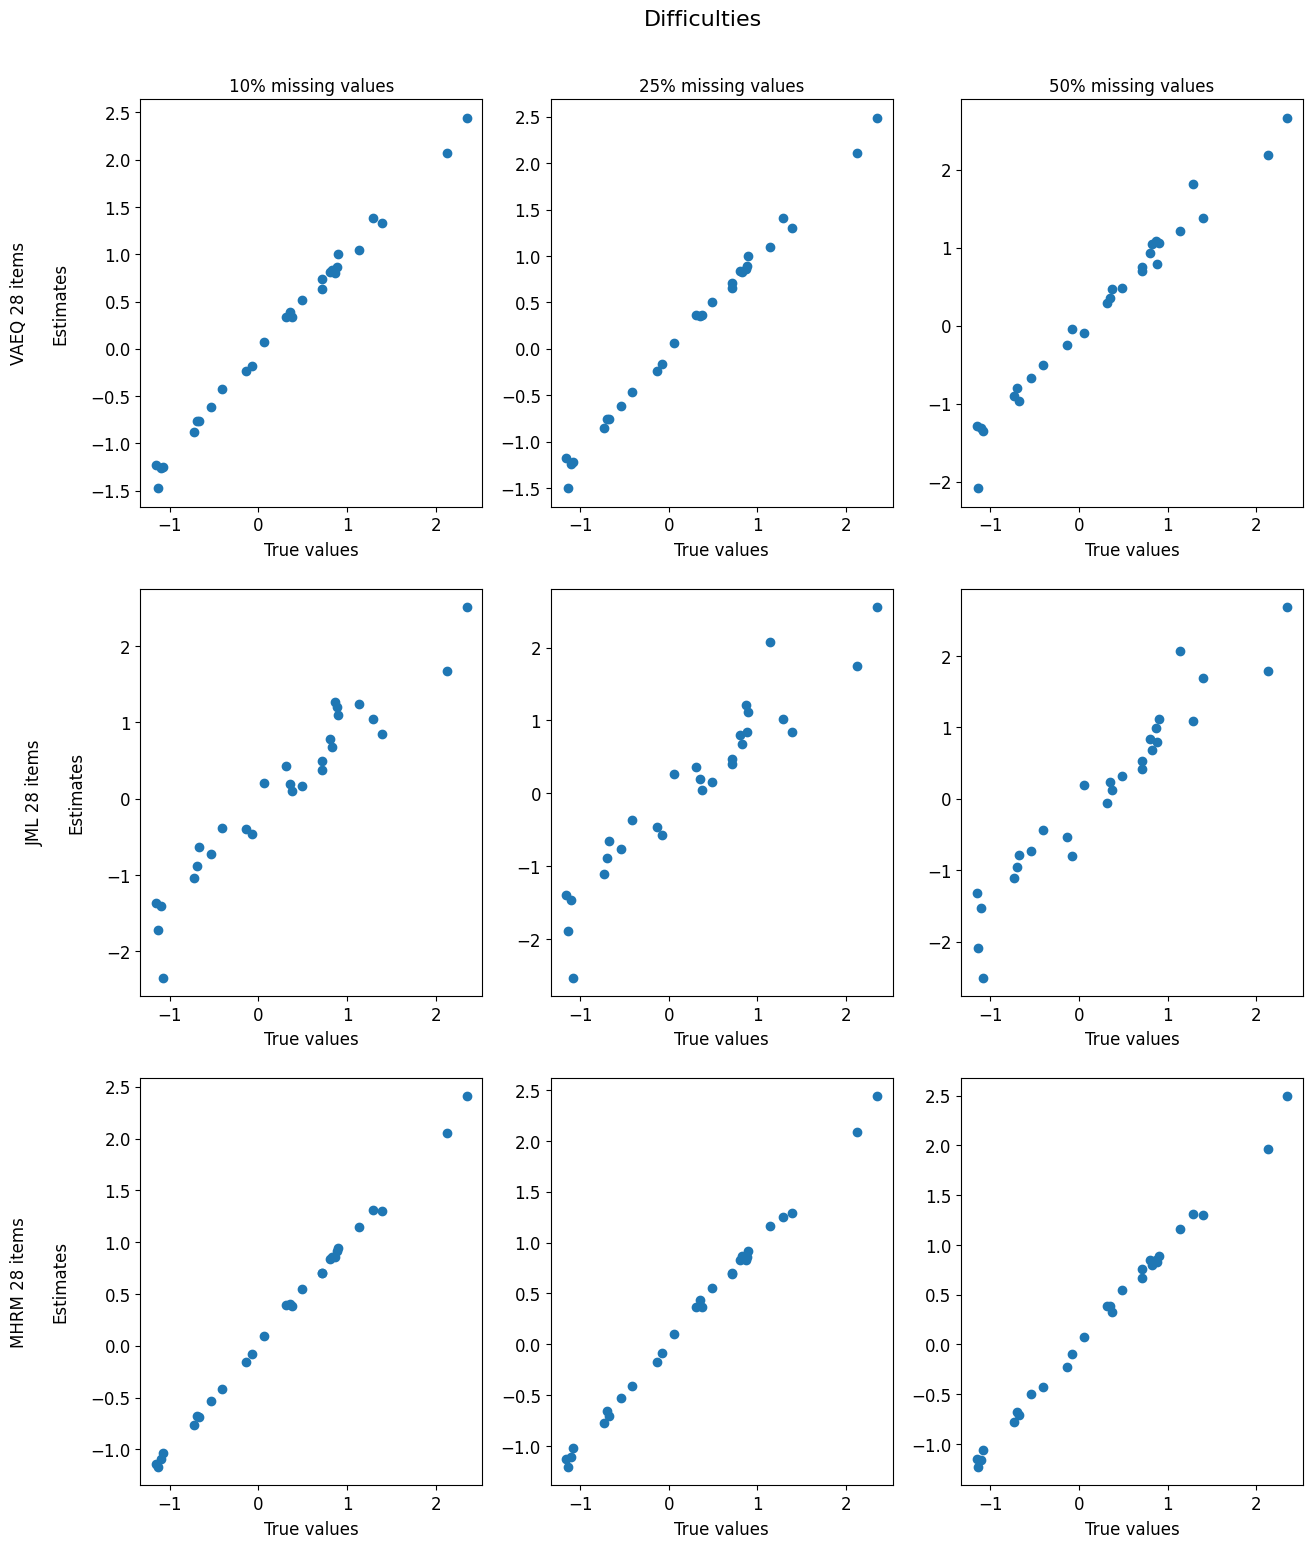

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(15, 18))


labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

# 1st column
axs[0, 0].scatter(b_values, b_10x28)
axs[0, 0].tick_params(axis='x', labelsize=labelsize)
axs[0, 0].tick_params(axis='y', labelsize=labelsize)
axs[0, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 0].scatter(b_values, b_10x28_jml)
axs[1, 0].tick_params(axis='x', labelsize=labelsize)
axs[1, 0].tick_params(axis='y', labelsize=labelsize)
axs[1, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 0].scatter(b_values, b_10x28_mhrm)
axs[2, 0].tick_params(axis='x', labelsize=labelsize)
axs[2, 0].tick_params(axis='y', labelsize=labelsize)
axs[2, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# 2nd column
axs[0, 1].scatter(b_values, b_25x28)
axs[0, 1].tick_params(axis='x', labelsize=labelsize)
axs[0, 1].tick_params(axis='y', labelsize=labelsize)
axs[0, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 1].scatter(b_values, b_25x28_jml)
axs[1, 1].tick_params(axis='x', labelsize=labelsize)
axs[1, 1].tick_params(axis='y', labelsize=labelsize)
axs[1, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 1].scatter(b_values, b_25x28_mhrm)
axs[2, 1].tick_params(axis='x', labelsize=labelsize)
axs[2, 1].tick_params(axis='y', labelsize=labelsize)
axs[2, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# 3rd column
axs[0, 2].scatter(b_values, b_50x28)
axs[0, 2].tick_params(axis='x', labelsize=labelsize)
axs[0, 2].tick_params(axis='y', labelsize=labelsize)
axs[0, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 2].scatter(b_values, b_50x28_jml)
axs[1, 2].tick_params(axis='x', labelsize=labelsize)
axs[1, 2].tick_params(axis='y', labelsize=labelsize)
axs[1, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 2].scatter(b_values, b_50x28_mhrm)
axs[2, 2].tick_params(axis='x', labelsize=labelsize)
axs[2, 2].tick_params(axis='y', labelsize=labelsize)
axs[2, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# Format axes labels
axs[0, 0].set_ylabel('VAEQ 28 items\n\nEstimates', **label_fmt)
axs[1, 0].set_ylabel('JML 28 items\n\nEstimates', **label_fmt)
axs[2, 0].set_ylabel('MHRM 28 items\n\nEstimates', **label_fmt)

axs[0, 0].set_title('10% missing values')
axs[0, 1].set_title('25% missing values')
axs[0, 2].set_title('50% missing values')

fig.suptitle('Difficulties', y=0.93, fontsize=16)



## Abilities 28x3

In [8]:
# Abilities
theta_values = pd.read_csv('3 dimensions/28 items/input_data/theta/theta_values.csv', sep=';', header=None)
theta_values = theta_values.values.reshape((3, 10000))[:, :8000].flatten()

theta_10x28 = pd.read_csv('3 dimensions/28 items/output_data/10_missing/theta/thetas_rep1_transformer_10_missing.csv', sep=';', header=0).iloc[:,0]
theta_25x28 = pd.read_csv('3 dimensions/28 items/output_data/25_missing/theta/thetas_rep1_transformer_25_missing.csv', sep=';', header=0).iloc[:,0]
theta_50x28 = pd.read_csv('3 dimensions/28 items/output_data/50_missing/theta/thetas_rep1_transformer_50_missing.csv', sep=';', header=0).iloc[:,0]

theta_10x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/10_missing/theta/thetas_rep1_jml_10_missing_2.csv', sep=';', header=None).values.transpose().flatten()
theta_25x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/25_missing/theta/thetas_rep1_jml_25_missing_2.csv', sep=';', header=None).values.transpose().flatten()
theta_50x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/50_missing/theta/thetas_rep1_jml_50_missing_2.csv', sep=';', header=None).values.transpose().flatten()

theta_10x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/10_missing/theta/thetas_rep1_mhrm_10_missing.csv', sep=';', header=None).values.transpose().flatten()
theta_25x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/25_missing/theta/thetas_rep1_mhrm_25_missing.csv', sep=';', header=None).values.transpose().flatten()
theta_50x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/50_missing/theta/thetas_rep1_mhrm_50_missing.csv', sep=';', header=None).values.transpose().flatten()

Text(0.5, 0.93, 'Abilities')

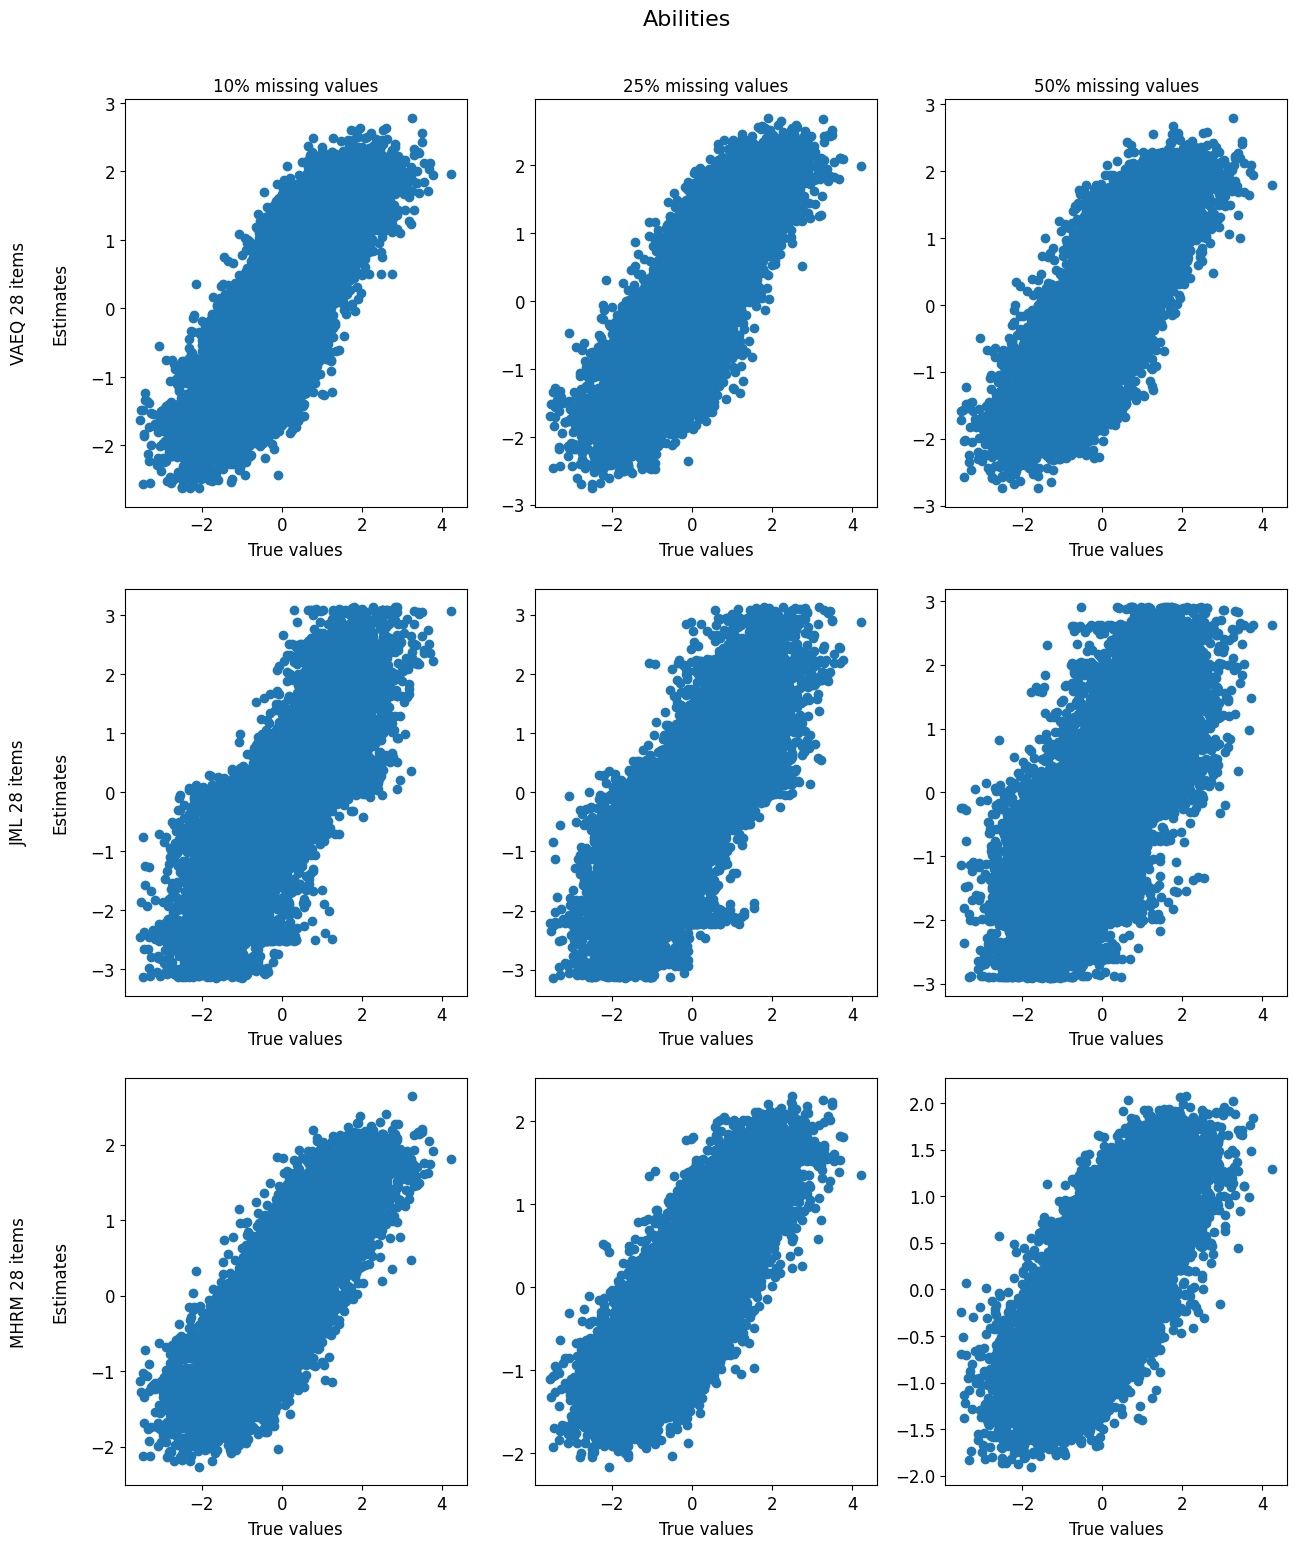

In [9]:
fig, axs = plt.subplots(3, 3, figsize=(15, 18))


labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

# 1st column
axs[0, 0].scatter(theta_values, theta_10x28)
axs[0, 0].tick_params(axis='x', labelsize=labelsize)
axs[0, 0].tick_params(axis='y', labelsize=labelsize)
axs[0, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 0].scatter(theta_values, theta_10x28_jml)
axs[1, 0].tick_params(axis='x', labelsize=labelsize)
axs[1, 0].tick_params(axis='y', labelsize=labelsize)
axs[1, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 0].scatter(theta_values, theta_10x28_mhrm)
axs[2, 0].tick_params(axis='x', labelsize=labelsize)
axs[2, 0].tick_params(axis='y', labelsize=labelsize)
axs[2, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# 2nd column
axs[0, 1].scatter(theta_values, theta_25x28)
axs[0, 1].tick_params(axis='x', labelsize=labelsize)
axs[0, 1].tick_params(axis='y', labelsize=labelsize)
axs[0, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 1].scatter(theta_values, theta_25x28_jml)
axs[1, 1].tick_params(axis='x', labelsize=labelsize)
axs[1, 1].tick_params(axis='y', labelsize=labelsize)
axs[1, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 1].scatter(theta_values, theta_25x28_mhrm)
axs[2, 1].tick_params(axis='x', labelsize=labelsize)
axs[2, 1].tick_params(axis='y', labelsize=labelsize)
axs[2, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# 3rd column
axs[0, 2].scatter(theta_values, theta_50x28)
axs[0, 2].tick_params(axis='x', labelsize=labelsize)
axs[0, 2].tick_params(axis='y', labelsize=labelsize)
axs[0, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 2].scatter(theta_values, theta_50x28_jml)
axs[1, 2].tick_params(axis='x', labelsize=labelsize)
axs[1, 2].tick_params(axis='y', labelsize=labelsize)
axs[1, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 2].scatter(theta_values, theta_50x28_mhrm)
axs[2, 2].tick_params(axis='x', labelsize=labelsize)
axs[2, 2].tick_params(axis='y', labelsize=labelsize)
axs[2, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# Format axes labels
axs[0, 0].set_ylabel('VAEQ 28 items\n\nEstimates', **label_fmt)
axs[1, 0].set_ylabel('JML 28 items\n\nEstimates', **label_fmt)
axs[2, 0].set_ylabel('MHRM 28 items\n\nEstimates', **label_fmt)

axs[0, 0].set_title('10% missing values')
axs[0, 1].set_title('25% missing values')
axs[0, 2].set_title('50% missing values')

fig.suptitle('Abilities', y=0.93, fontsize=16)



## Discriminations 90x21

In [10]:
# Discriminations
a_values = pd.read_csv('21 dimensions/90 items/input_data/a/a_values.csv', sep=';', header=None)
a_10x90 = pd.read_csv('21 dimensions/90 items/output_data/10_missing/a/discr_hat_rep1_transformer_10_missing_TRANSPOSED.csv', sep=';', header=None)
a_25x90 = pd.read_csv('21 dimensions/90 items/output_data/25_missing/a/discr_hat_rep1_transformer_25_missing_TRANSPOSED.csv', sep=';', header=None)
a_50x90 = pd.read_csv('21 dimensions/90 items/output_data/50_missing/a/discr_hat_rep1_transformer_50_missing_TRANSPOSED.csv', sep=';', header=None)

a_10x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/10_missing/a/discr_hat_rep1_jml_10_missing_2.csv', sep=';', header=None).values.transpose().flatten()
a_10x90_jml = a_10x90_jml[a_10x90_jml != 0.0]
a_25x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/25_missing/a/discr_hat_rep1_jml_25_missing_2.csv', sep=';', header=None).values.transpose().flatten()
a_25x90_jml = a_25x90_jml[a_25x90_jml != 0.0]
a_50x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/50_missing/a/discr_hat_rep1_jml_50_missing_2.csv', sep=';', header=None).values.transpose().flatten()
a_50x90_jml = a_50x90_jml[a_50x90_jml != 0.0]

a_10x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/10_missing/a/discr_hat_rep1_mhrm_10_missing.csv', sep=';', header=None)
a_25x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/25_missing/a/discr_hat_rep1_mhrm_25_missing.csv', sep=';', header=None)
a_50x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/50_missing/a/discr_hat_rep1_mhrm_50_missing.csv', sep=';', header=None)

Text(0.5, 0.93, 'Discriminations')

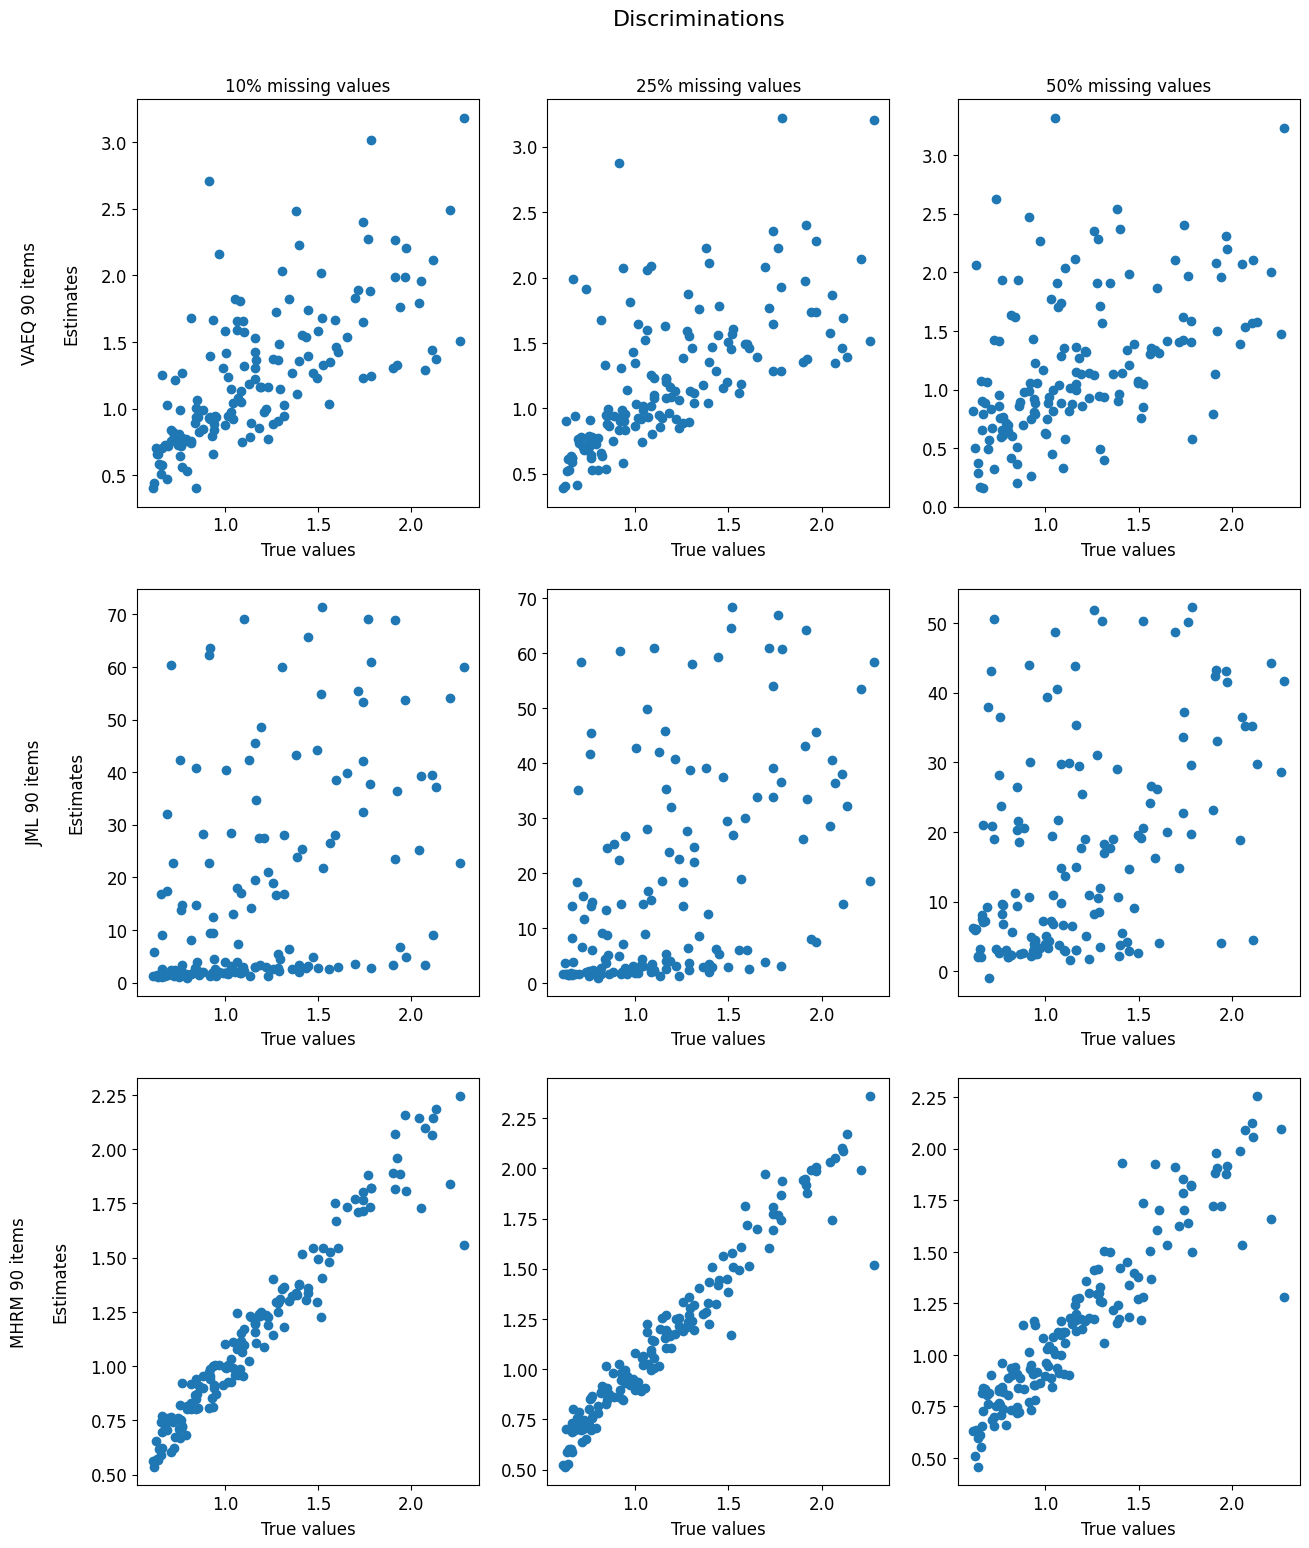

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(15, 18))


labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

# 1st column
axs[0, 0].scatter(a_values, a_10x90)
axs[0, 0].tick_params(axis='x', labelsize=labelsize)
axs[0, 0].tick_params(axis='y', labelsize=labelsize)
axs[0, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 0].scatter(a_values, a_10x90_jml)
axs[1, 0].tick_params(axis='x', labelsize=labelsize)
axs[1, 0].tick_params(axis='y', labelsize=labelsize)
axs[1, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 0].scatter(a_values, a_10x90_mhrm)
axs[2, 0].tick_params(axis='x', labelsize=labelsize)
axs[2, 0].tick_params(axis='y', labelsize=labelsize)
axs[2, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# 2nd column
axs[0, 1].scatter(a_values, a_25x90)
axs[0, 1].tick_params(axis='x', labelsize=labelsize)
axs[0, 1].tick_params(axis='y', labelsize=labelsize)
axs[0, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 1].scatter(a_values, a_25x90_jml)
axs[1, 1].tick_params(axis='x', labelsize=labelsize)
axs[1, 1].tick_params(axis='y', labelsize=labelsize)
axs[1, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 1].scatter(a_values, a_25x90_mhrm)
axs[2, 1].tick_params(axis='x', labelsize=labelsize)
axs[2, 1].tick_params(axis='y', labelsize=labelsize)
axs[2, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# 3rd column
axs[0, 2].scatter(a_values, a_50x90)
axs[0, 2].tick_params(axis='x', labelsize=labelsize)
axs[0, 2].tick_params(axis='y', labelsize=labelsize)
axs[0, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 2].scatter(a_values, a_50x90_jml)
axs[1, 2].tick_params(axis='x', labelsize=labelsize)
axs[1, 2].tick_params(axis='y', labelsize=labelsize)
axs[1, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 2].scatter(a_values, a_50x90_mhrm)
axs[2, 2].tick_params(axis='x', labelsize=labelsize)
axs[2, 2].tick_params(axis='y', labelsize=labelsize)
axs[2, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# Format axes labels
axs[0, 0].set_ylabel('VAEQ 90 items\n\nEstimates', **label_fmt)
axs[1, 0].set_ylabel('JML 90 items\n\nEstimates', **label_fmt)
axs[2, 0].set_ylabel('MHRM 90 items\n\nEstimates', **label_fmt)

axs[0, 0].set_title('10% missing values')
axs[0, 1].set_title('25% missing values')
axs[0, 2].set_title('50% missing values')

fig.suptitle('Discriminations', y=0.93, fontsize=16)



## Difficulties 90x21

In [12]:
# Difficulties
b_values = pd.read_csv('21 dimensions/90 items/input_data/b/b_values.csv', sep=';', header=None)
b_10x90 = pd.read_csv('21 dimensions/90 items/output_data/10_missing/b/diff_rep1_transformer_10_missing.csv', sep=';', header=None)
b_25x90 = pd.read_csv('21 dimensions/90 items/output_data/25_missing/b/diff_rep1_transformer_25_missing.csv', sep=';', header=None)
b_50x90 = pd.read_csv('21 dimensions/90 items/output_data/50_missing/b/diff_rep1_transformer_50_missing.csv', sep=';', header=None)

b_10x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/10_missing/b/diff_hat_rep1_jml_10_missing_2.csv', sep=';', header=None)
b_25x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/25_missing/b/diff_hat_rep1_jml_25_missing_2.csv', sep=';', header=None)
b_50x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/50_missing/b/diff_hat_rep1_jml_50_missing_2.csv', sep=';', header=None)

b_10x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/10_missing/b/diff_hat_rep1_mhrm_10_missing.csv', sep=';', header=None)
b_25x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/25_missing/b/diff_hat_rep1_mhrm_25_missing.csv', sep=';', header=None)
b_50x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/50_missing/b/diff_hat_rep1_mhrm_50_missing.csv', sep=';', header=None)

Text(0.5, 0.93, 'Difficulties')

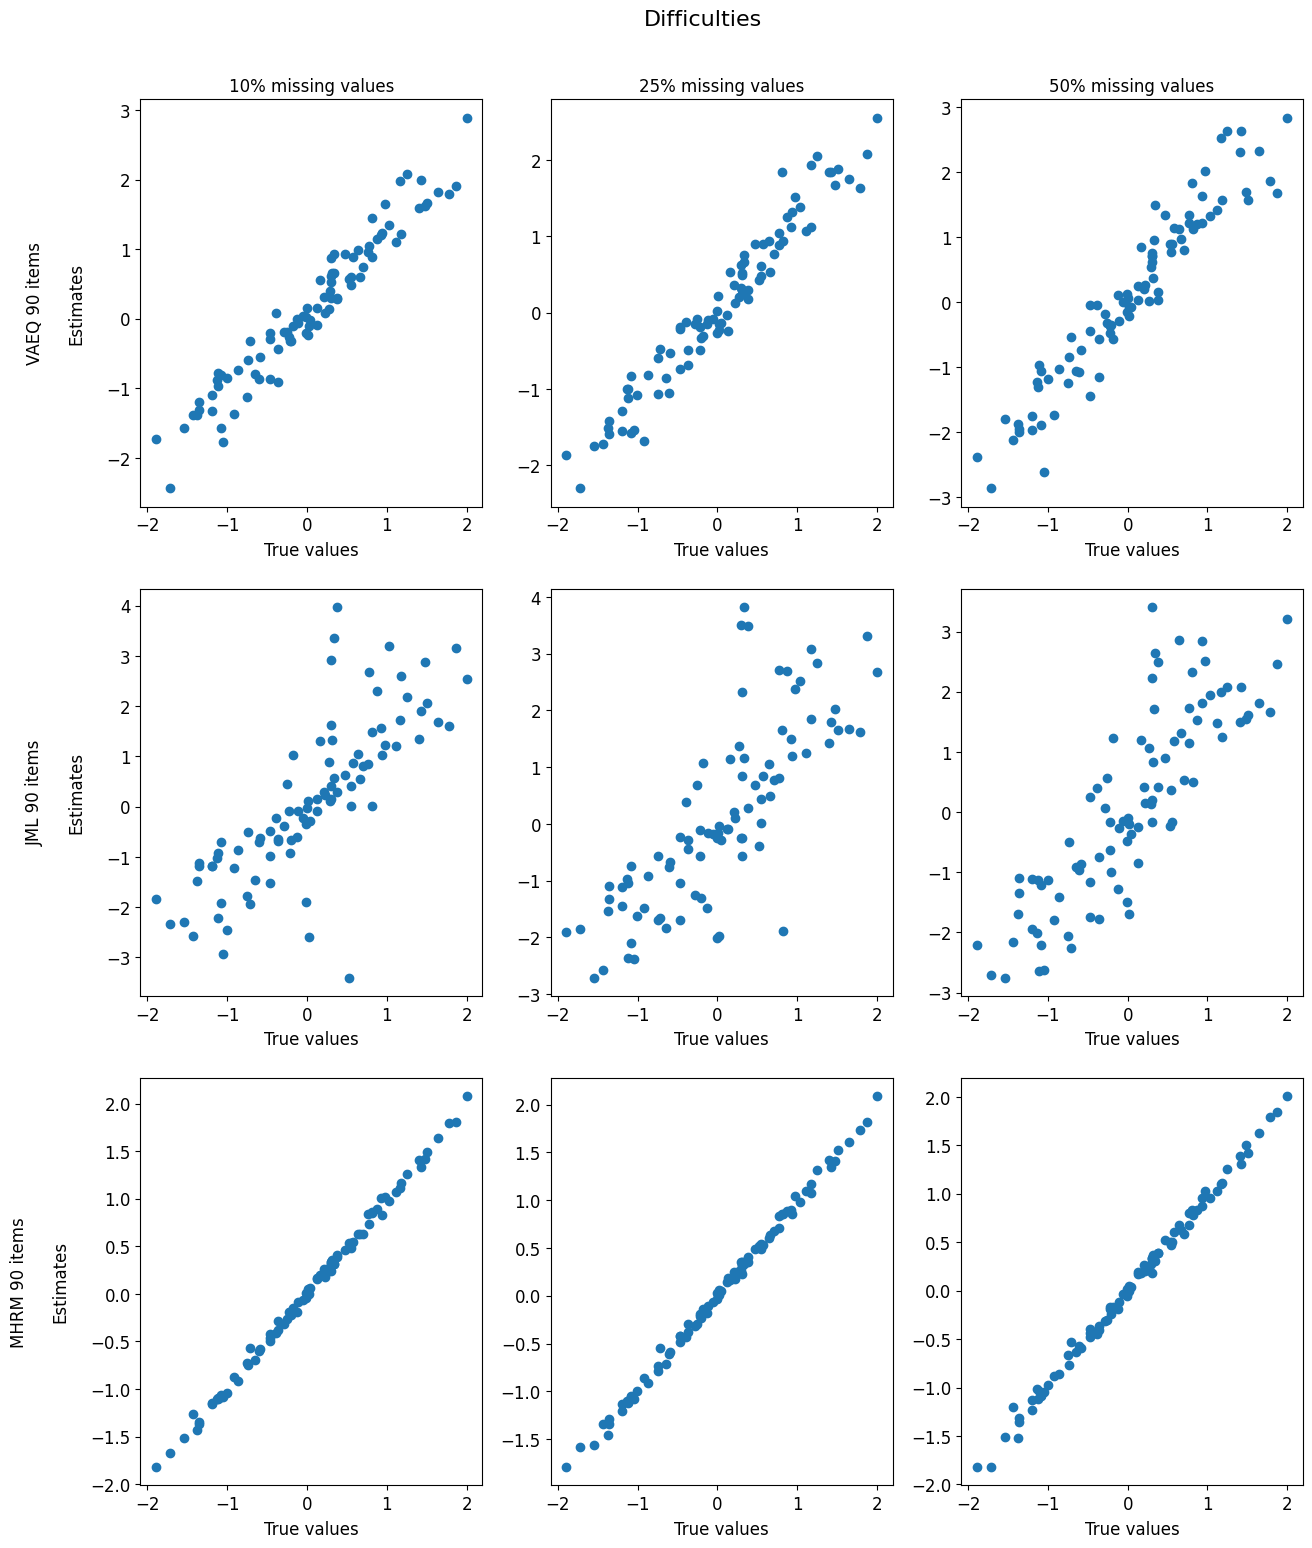

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(15, 18))


labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

# 1st column
axs[0, 0].scatter(b_values, b_10x90)
axs[0, 0].tick_params(axis='x', labelsize=labelsize)
axs[0, 0].tick_params(axis='y', labelsize=labelsize)
axs[0, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 0].scatter(b_values, b_10x90_jml)
axs[1, 0].tick_params(axis='x', labelsize=labelsize)
axs[1, 0].tick_params(axis='y', labelsize=labelsize)
axs[1, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 0].scatter(b_values, b_10x90_mhrm)
axs[2, 0].tick_params(axis='x', labelsize=labelsize)
axs[2, 0].tick_params(axis='y', labelsize=labelsize)
axs[2, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# 2nd column
axs[0, 1].scatter(b_values, b_25x90)
axs[0, 1].tick_params(axis='x', labelsize=labelsize)
axs[0, 1].tick_params(axis='y', labelsize=labelsize)
axs[0, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 1].scatter(b_values, b_25x90_jml)
axs[1, 1].tick_params(axis='x', labelsize=labelsize)
axs[1, 1].tick_params(axis='y', labelsize=labelsize)
axs[1, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 1].scatter(b_values, b_25x90_mhrm)
axs[2, 1].tick_params(axis='x', labelsize=labelsize)
axs[2, 1].tick_params(axis='y', labelsize=labelsize)
axs[2, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# 3rd column
axs[0, 2].scatter(b_values, b_50x90)
axs[0, 2].tick_params(axis='x', labelsize=labelsize)
axs[0, 2].tick_params(axis='y', labelsize=labelsize)
axs[0, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 2].scatter(b_values, b_50x90_jml)
axs[1, 2].tick_params(axis='x', labelsize=labelsize)
axs[1, 2].tick_params(axis='y', labelsize=labelsize)
axs[1, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 2].scatter(b_values, b_50x90_mhrm)
axs[2, 2].tick_params(axis='x', labelsize=labelsize)
axs[2, 2].tick_params(axis='y', labelsize=labelsize)
axs[2, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# Format axes labels
axs[0, 0].set_ylabel('VAEQ 90 items\n\nEstimates', **label_fmt)
axs[1, 0].set_ylabel('JML 90 items\n\nEstimates', **label_fmt)
axs[2, 0].set_ylabel('MHRM 90 items\n\nEstimates', **label_fmt)

axs[0, 0].set_title('10% missing values')
axs[0, 1].set_title('25% missing values')
axs[0, 2].set_title('50% missing values')

fig.suptitle('Difficulties', y=0.93, fontsize=16)



## Abilities 90x21

In [14]:
# Abilities
theta_values = pd.read_csv('21 dimensions/90 items/input_data/theta/theta_values.csv', sep=';', header=None)
theta_values = theta_values.values.reshape((21, 10000))[:, :8000].flatten()

theta_10x90 = pd.read_csv('21 dimensions/90 items/output_data/10_missing/theta/thetas_rep1_transformer_10_missing.csv', sep=';', header=0).iloc[:,0]
theta_25x90 = pd.read_csv('21 dimensions/90 items/output_data/25_missing/theta/thetas_rep1_transformer_25_missing.csv', sep=';', header=0).iloc[:,0]
theta_50x90 = pd.read_csv('21 dimensions/90 items/output_data/50_missing/theta/thetas_rep1_transformer_50_missing.csv', sep=';', header=0).iloc[:,0]

theta_10x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/10_missing/theta/thetas_rep1_jml_10_missing_2.csv', sep=';', header=None).values.transpose().flatten()
theta_25x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/25_missing/theta/thetas_rep1_jml_25_missing_2.csv', sep=';', header=None).values.transpose().flatten()
theta_50x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/50_missing/theta/thetas_rep1_jml_50_missing_2.csv', sep=';', header=None).values.transpose().flatten()

theta_10x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/10_missing/theta/thetas_rep1_mhrm_10_missing.csv', sep=';', header=None).values.transpose().flatten()
theta_25x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/25_missing/theta/thetas_rep1_mhrm_25_missing.csv', sep=';', header=None).values.transpose().flatten()
theta_50x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/50_missing/theta/thetas_rep1_mhrm_50_missing.csv', sep=';', header=None).values.transpose().flatten()

Text(0.5, 0.93, 'Abilities')

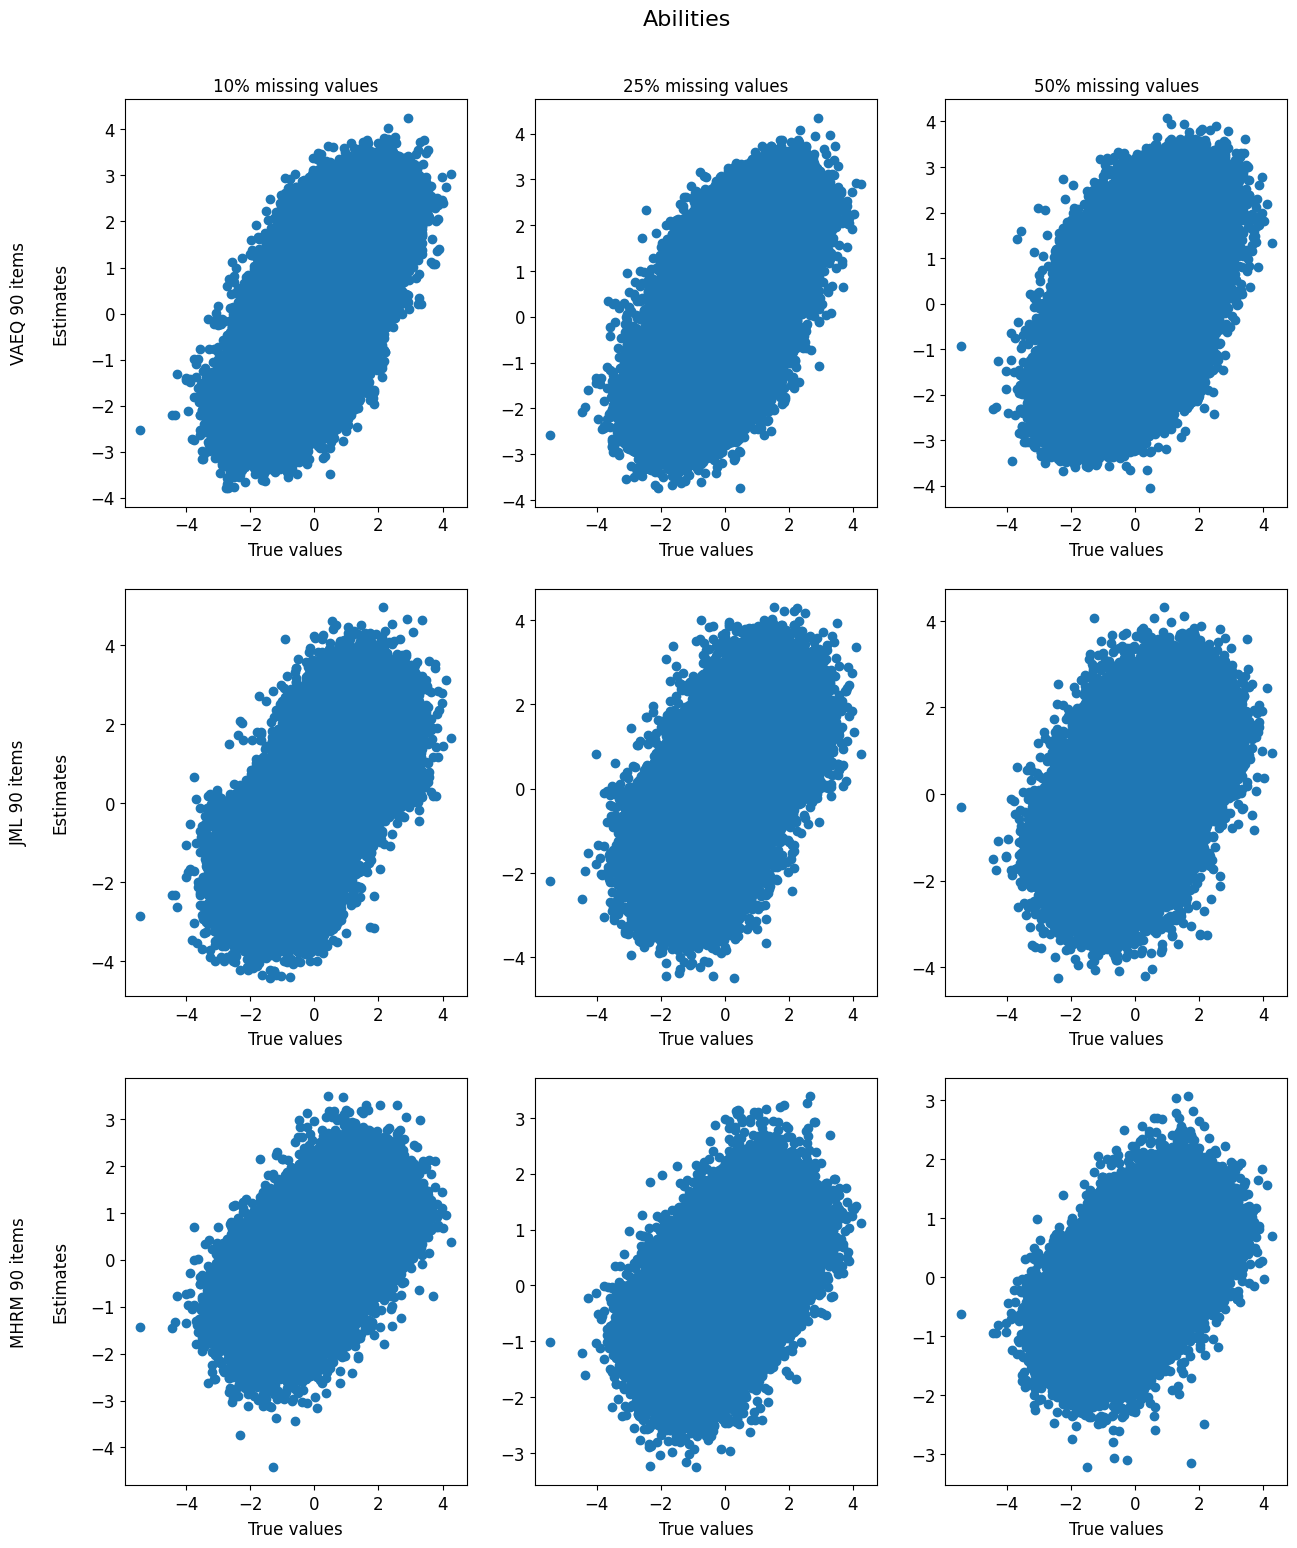

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(15, 18))


labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

# 1st column
axs[0, 0].scatter(theta_values, theta_10x90)
axs[0, 0].tick_params(axis='x', labelsize=labelsize)
axs[0, 0].tick_params(axis='y', labelsize=labelsize)
axs[0, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 0].scatter(theta_values, theta_10x90_jml)
axs[1, 0].tick_params(axis='x', labelsize=labelsize)
axs[1, 0].tick_params(axis='y', labelsize=labelsize)
axs[1, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 0].scatter(theta_values, theta_10x90_mhrm)
axs[2, 0].tick_params(axis='x', labelsize=labelsize)
axs[2, 0].tick_params(axis='y', labelsize=labelsize)
axs[2, 0].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# 2nd column
axs[0, 1].scatter(theta_values, theta_25x90)
axs[0, 1].tick_params(axis='x', labelsize=labelsize)
axs[0, 1].tick_params(axis='y', labelsize=labelsize)
axs[0, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 1].scatter(theta_values, theta_25x90_jml)
axs[1, 1].tick_params(axis='x', labelsize=labelsize)
axs[1, 1].tick_params(axis='y', labelsize=labelsize)
axs[1, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 1].scatter(theta_values, theta_25x90_mhrm)
axs[2, 1].tick_params(axis='x', labelsize=labelsize)
axs[2, 1].tick_params(axis='y', labelsize=labelsize)
axs[2, 1].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# 3rd column
axs[0, 2].scatter(theta_values, theta_50x90)
axs[0, 2].tick_params(axis='x', labelsize=labelsize)
axs[0, 2].tick_params(axis='y', labelsize=labelsize)
axs[0, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[1, 2].scatter(theta_values, theta_50x90_jml)
axs[1, 2].tick_params(axis='x', labelsize=labelsize)
axs[1, 2].tick_params(axis='y', labelsize=labelsize)
axs[1, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))
axs[2, 2].scatter(theta_values, theta_50x90_mhrm)
axs[2, 2].tick_params(axis='x', labelsize=labelsize)
axs[2, 2].tick_params(axis='y', labelsize=labelsize)
axs[2, 2].set_xlabel('True values', **dict(size=labelsize, labelpad=5))

# Format axes labels
axs[0, 0].set_ylabel('VAEQ 90 items\n\nEstimates', **label_fmt)
axs[1, 0].set_ylabel('JML 90 items\n\nEstimates', **label_fmt)
axs[2, 0].set_ylabel('MHRM 90 items\n\nEstimates', **label_fmt)

axs[0, 0].set_title('10% missing values')
axs[0, 1].set_title('25% missing values')
axs[0, 2].set_title('50% missing values')

fig.suptitle('Abilities', y=0.93, fontsize=16)



# Boxplot

In [16]:
# Discriminations
a_10x28 = pd.read_csv('3 dimensions/28 items/output_data/10_missing/a/a_results.csv', sep=';', header=0)
a_25x28 = pd.read_csv('3 dimensions/28 items/output_data/25_missing/a/a_results.csv', sep=';', header=0)
a_50x28 = pd.read_csv('3 dimensions/28 items/output_data/50_missing/a/a_results.csv', sep=';', header=0)

a_10x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/10_missing/a/a_results.csv', sep=';', header=0)
a_25x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/25_missing/a/a_results.csv', sep=';', header=0)
a_50x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/50_missing/a/a_results.csv', sep=';', header=0)

a_10x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/10_missing/a/a_results.csv', sep=';', header=0)
a_25x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/25_missing/a/a_results.csv', sep=';', header=0)
a_50x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/50_missing/a/a_results.csv', sep=';', header=0)

# Difficulties
b_10x28 = pd.read_csv('3 dimensions/28 items/output_data/10_missing/b/b_results.csv', sep=';', header=0)
b_25x28 = pd.read_csv('3 dimensions/28 items/output_data/25_missing/b/b_results.csv', sep=';', header=0)
b_50x28 = pd.read_csv('3 dimensions/28 items/output_data/50_missing/b/b_results.csv', sep=';', header=0)

b_10x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/10_missing/b/b_results.csv', sep=';', header=0)
b_25x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/25_missing/b/b_results.csv', sep=';', header=0)
b_50x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/50_missing/b/b_results.csv', sep=';', header=0)

b_10x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/10_missing/b/b_results.csv', sep=';', header=0)
b_25x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/25_missing/b/b_results.csv', sep=';', header=0)
b_50x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/50_missing/b/b_results.csv', sep=';', header=0)

# Abilities
theta_10x28 = pd.read_csv('3 dimensions/28 items/output_data/10_missing/theta/theta_results.csv', sep=';', header=0)
theta_25x28 = pd.read_csv('3 dimensions/28 items/output_data/25_missing/theta/theta_results.csv', sep=';', header=0)
theta_50x28 = pd.read_csv('3 dimensions/28 items/output_data/50_missing/theta/theta_results.csv', sep=';', header=0)

theta_10x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/10_missing/theta/theta_results.csv', sep=';', header=0)
theta_25x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/25_missing/theta/theta_results.csv', sep=';', header=0)
theta_50x28_jml = pd.read_csv('3 dimensions/28 items/output_data_jml/50_missing/theta/theta_results.csv', sep=';', header=0)

theta_10x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/10_missing/theta/theta_results.csv', sep=';', header=0)
theta_25x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/25_missing/theta/theta_results.csv', sep=';', header=0)
theta_50x28_mhrm = pd.read_csv('3 dimensions/28 items/output_data_mhrm/50_missing/theta/theta_results.csv', sep=';', header=0)


In [17]:
# Discriminations
l1 = []
l1.extend(a_10x28['RMSE'])
l1.extend(a_25x28['RMSE'])
l1.extend(a_50x28['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [37, 37, 37]),
            value = np.array(l1))

a_df_28 = pd.DataFrame(data)

l1 = []
l1.extend(a_10x28['Bias'])
l1.extend(a_25x28['Bias'])
l1.extend(a_50x28['Bias'])

data = dict(per = np.repeat([10, 25, 50], [37, 37, 37]),
            value = np.array(l1))

a_df_28_BIAS = pd.DataFrame(data)

l1 = []
l1.extend(a_10x28_jml['RMSE'])
l1.extend(a_25x28_jml['RMSE'])
l1.extend(a_50x28_jml['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [37, 37, 37]),
            value = np.array(l1))

a_df_28_jml = pd.DataFrame(data)

l1 = []
l1.extend(a_10x28_jml['Bias'])
l1.extend(a_25x28_jml['Bias'])
l1.extend(a_50x28_jml['Bias'])

data = dict(per = np.repeat([10, 25, 50], [37, 37, 37]),
            value = np.array(l1))

a_df_28_jml_BIAS = pd.DataFrame(data)

l1 = []
l1.extend(a_10x28_mhrm['RMSE'])
l1.extend(a_25x28_mhrm['RMSE'])
l1.extend(a_50x28_mhrm['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [37, 37, 37]),
            value = np.array(l1))

a_df_28_mhrm = pd.DataFrame(data)

l1 = []
l1.extend(a_10x28_mhrm['Bias'])
l1.extend(a_25x28_mhrm['Bias'])
l1.extend(a_50x28_mhrm['Bias'])

data = dict(per = np.repeat([10, 25, 50], [37, 37, 37]),
            value = np.array(l1))

a_df_28_mhrm_BIAS = pd.DataFrame(data)

# Difficulties
l1 = []
l1.extend(b_10x28['RMSE'])
l1.extend(b_25x28['RMSE'])
l1.extend(b_50x28['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [28, 28, 28]),
            value = np.array(l1))

b_df_28 = pd.DataFrame(data)

l1 = []
l1.extend(b_10x28['Bias'])
l1.extend(b_25x28['Bias'])
l1.extend(b_50x28['Bias'])

data = dict(per = np.repeat([10, 25, 50], [28, 28, 28]),
            value = np.array(l1))

b_df_28_BIAS = pd.DataFrame(data)

l1 = []
l1.extend(b_10x28_jml['RMSE'])
l1.extend(b_25x28_jml['RMSE'])
l1.extend(b_50x28_jml['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [28, 28, 28]),
            value = np.array(l1))

b_df_28_jml = pd.DataFrame(data)

l1 = []
l1.extend(b_10x28_jml['Bias'])
l1.extend(b_25x28_jml['Bias'])
l1.extend(b_50x28_jml['Bias'])

data = dict(per = np.repeat([10, 25, 50], [28, 28, 28]),
            value = np.array(l1))

b_df_28_jml_BIAS = pd.DataFrame(data)

l1 = []
l1.extend(b_10x28_mhrm['RMSE'])
l1.extend(b_25x28_mhrm['RMSE'])
l1.extend(b_50x28_mhrm['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [28, 28, 28]),
            value = np.array(l1))

b_df_28_mhrm = pd.DataFrame(data)

l1 = []
l1.extend(b_10x28_mhrm['Bias'])
l1.extend(b_25x28_mhrm['Bias'])
l1.extend(b_50x28_mhrm['Bias'])

data = dict(per = np.repeat([10, 25, 50], [28, 28, 28]),
            value = np.array(l1))

b_df_28_mhrm_BIAS = pd.DataFrame(data)

# Abilities
l1 = []
l1.extend(theta_10x28['RMSE'])
l1.extend(theta_25x28['RMSE'])
l1.extend(theta_50x28['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [24000, 24000, 24000]),
            value = np.array(l1))

theta_df_28 = pd.DataFrame(data)

l1 = []
l1.extend(theta_10x28['Bias'])
l1.extend(theta_25x28['Bias'])
l1.extend(theta_50x28['Bias'])

data = dict(per = np.repeat([10, 25, 50], [24000, 24000, 24000]),
            value = np.array(l1))

theta_df_28_BIAS = pd.DataFrame(data)

l1 = []
l1.extend(theta_10x28_jml['RMSE'])
l1.extend(theta_25x28_jml['RMSE'])
l1.extend(theta_50x28_jml['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [24000, 24000, 24000]),
            value = np.array(l1))

theta_df_28_jml = pd.DataFrame(data)

l1 = []
l1.extend(theta_10x28_jml['Bias'])
l1.extend(theta_25x28_jml['Bias'])
l1.extend(theta_50x28_jml['Bias'])

data = dict(per = np.repeat([10, 25, 50], [24000, 24000, 24000]),
            value = np.array(l1))

theta_df_28_jml_BIAS = pd.DataFrame(data)

l1 = []
l1.extend(theta_10x28_mhrm['RMSE'])
l1.extend(theta_25x28_mhrm['RMSE'])
l1.extend(theta_50x28_mhrm['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [24000, 24000, 24000]),
            value = np.array(l1))

theta_df_28_mhrm = pd.DataFrame(data)

l1 = []
l1.extend(theta_10x28_mhrm['Bias'])
l1.extend(theta_25x28_mhrm['Bias'])
l1.extend(theta_50x28_mhrm['Bias'])

data = dict(per = np.repeat([10, 25, 50], [24000, 24000, 24000]),
            value = np.array(l1))

theta_df_28_mhrm_BIAS = pd.DataFrame(data)

## Discriminations 28x3

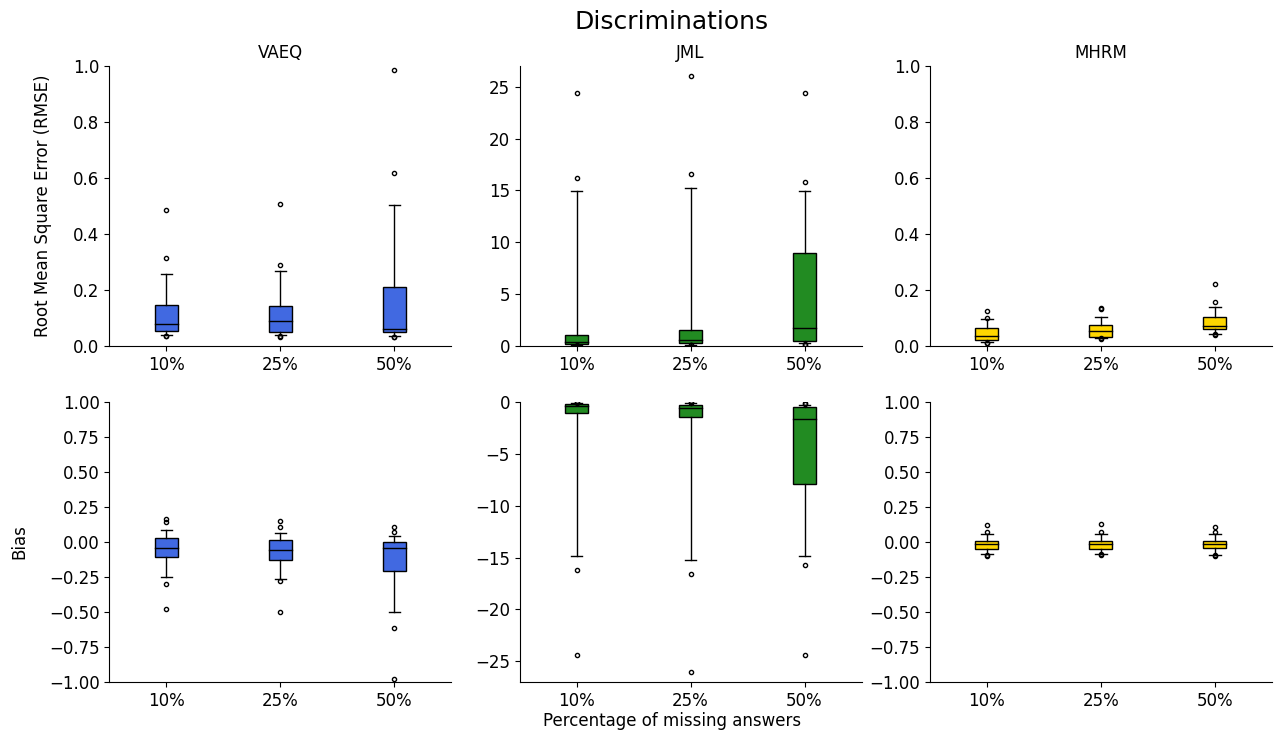

In [26]:
# Reference: https://stackoverflow.com/a/65541965

# Pivot table according to the 'per' categories so that the cap and
# cost variables are grouped by them:
p28_vaeq = a_df_28.pivot(columns=['per'])
p28_jml = a_df_28_jml.pivot(columns=['per'])
p28_mhrm = a_df_28_mhrm.pivot(columns=['per'])

rmse = [p28_vaeq, p28_jml, p28_mhrm]

p28_vaeq = a_df_28_BIAS.pivot(columns=['per'])
p28_jml = a_df_28_jml_BIAS.pivot(columns=['per'])
p28_mhrm = a_df_28_mhrm_BIAS.pivot(columns=['per'])

bias = [p28_vaeq, p28_jml, p28_mhrm]

stats_values = [rmse, bias] 

# Create figure and dictionary containing boxplot parameters that are
# common to both boxplots (according to my style preferences):
# note that I define the whis parameter so that values below the 5th
# percentile and above the 95th percentile are shown as outliers
nb_groups = a_df_28['per'].nunique()

colors = ['royalblue', 'forestgreen', 'gold']
ylabels = ['Root Mean Square Error (RMSE)', 'Bias']

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

box_param = dict(whis=(5, 95), widths=0.2, patch_artist=True,
                    flierprops=dict(marker='.', markeredgecolor='black',
                    fillstyle=None), medianprops=dict(color='black'))

for i in range(2):
    # Create an array of the 28 and 56 dimansions values for a's (discriminations) 
    # grouped variables to be plotted in each (twinned) boxplot.

    i28_vaeq = [stats_values[i][0]['value'][var].dropna() for var in stats_values[i][0]['value']]
    i28_jml = [stats_values[i][1]['value'][var].dropna() for var in stats_values[i][1]['value']]
    i28_mhrm = [stats_values[i][2]['value'][var].dropna() for var in stats_values[i][2]['value']]  

    # Create boxplots for 'i28' variables: note the double asterisk used
    # to unpack the dictionary of boxplot parameters
    axs[i][0].boxplot(i28_vaeq, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[0]), **box_param)

    axs[i][1].boxplot(i28_jml, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[1]), **box_param)

    axs[i][2].boxplot(i28_mhrm, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[2]), **box_param)

    # Format x ticks
    labelsize = 12

    axs[i][0].set_xticks(np.arange(nb_groups))
    axs[i][0].set_xticklabels([f'{label}%' for label in a_df_28['per'].unique()])
    axs[i][0].tick_params(axis='x', labelsize=labelsize)
    
    axs[i][1].set_xticks(np.arange(nb_groups))
    axs[i][1].set_xticklabels([f'{label}%' for label in a_df_28['per'].unique()])
    axs[i][1].tick_params(axis='x', labelsize=labelsize)

    axs[i][2].set_xticks(np.arange(nb_groups))
    axs[i][2].set_xticklabels([f'{label}%' for label in a_df_28['per'].unique()])
    axs[i][2].tick_params(axis='x', labelsize=labelsize)

    # Format y ticks
    yticks_fmt = dict(axis='y', labelsize=labelsize)
    axs[i][0].tick_params(**yticks_fmt)
    axs[i][1].tick_params(**yticks_fmt)
    axs[i][2].tick_params(**yticks_fmt)

    # Format axes labels
    xmin_vaeq = np.floor(np.min(i28_vaeq))
    xmin_jml = np.floor(np.min(i28_jml))
    xmin_mhrm = np.floor(np.min(i28_mhrm))
    xmax_vaeq = np.ceil(np.max(i28_vaeq))
    xmax_jml = np.ceil(np.max(i28_jml))
    xmax_mhrm = np.ceil(np.max(i28_mhrm))

    label_fmt = dict(size=12, labelpad=15)
    axs[i][0].spines['top'].set_visible(False)
    axs[i][0].spines['right'].set_visible(False)
    axs[i][0].set_ylim([xmin_vaeq, xmax_vaeq])

    axs[i][1].spines['top'].set_visible(False)
    axs[i][1].spines['right'].set_visible(False)
    axs[i][1].set_ylim([xmin_jml, xmax_jml])

    axs[i][2].spines['top'].set_visible(False)
    axs[i][2].spines['right'].set_visible(False)
    axs[i][2].set_ylim([xmin_mhrm, xmax_mhrm])

    axs[i][0].set_ylabel(ylabels[i], **label_fmt)

axs[0][0].set_title('VAEQ')
axs[0][1].set_title('JML')
axs[0][2].set_title('MHRM')
fig.suptitle('Discriminations', y=0.95, size=18)

fig.supxlabel(
    'Percentage of missing answers', 
    y=0.05, 
    fontsize=12)

plt.show()

## Difficulties 28x3

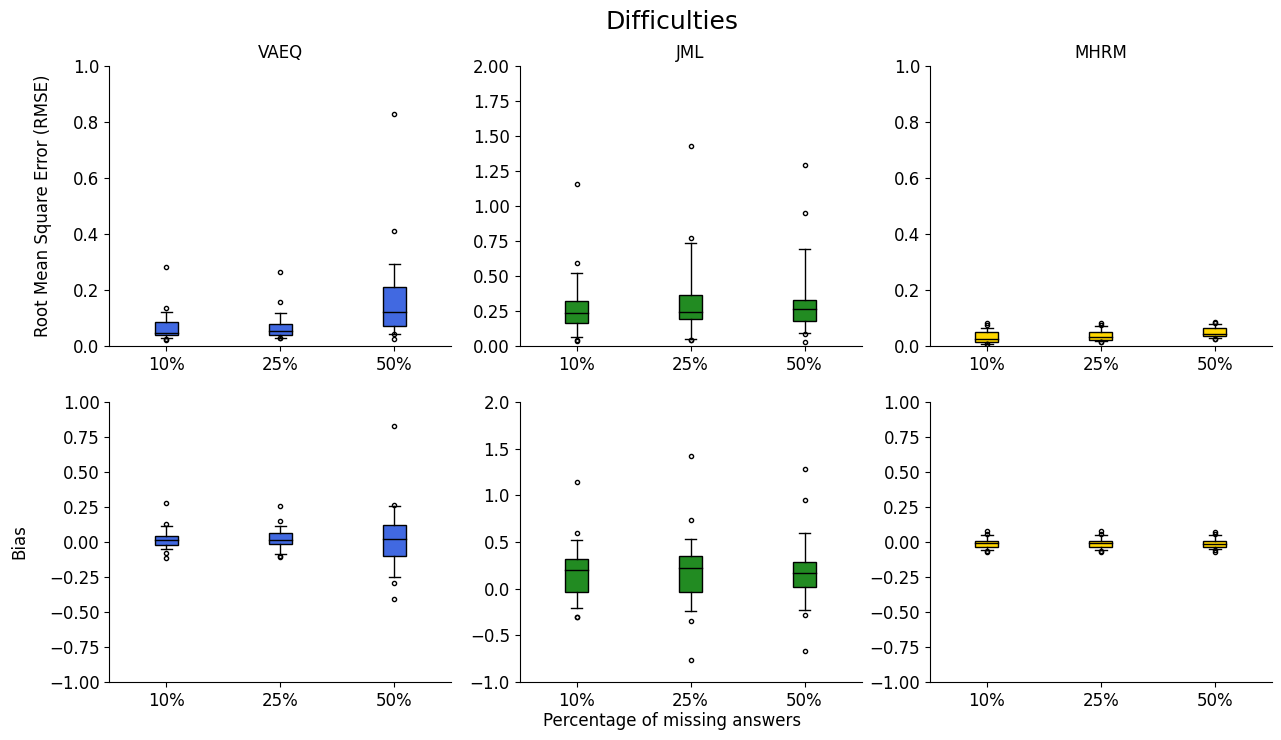

In [27]:
# Reference: https://stackoverflow.com/a/65541965

# Pivot table according to the 'per' categories so that the cap and
# cost variables are grouped by them:
p28_vaeq = b_df_28.pivot(columns=['per'])
p28_jml = b_df_28_jml.pivot(columns=['per'])
p28_mhrm = b_df_28_mhrm.pivot(columns=['per'])

rmse = [p28_vaeq, p28_jml, p28_mhrm]

p28_vaeq = b_df_28_BIAS.pivot(columns=['per'])
p28_jml = b_df_28_jml_BIAS.pivot(columns=['per'])
p28_mhrm = b_df_28_mhrm_BIAS.pivot(columns=['per'])

bias = [p28_vaeq, p28_jml, p28_mhrm]

stats_values = [rmse, bias] 

# Create figure and dictionary containing boxplot parameters that are
# common to both boxplots (according to my style preferences):
# note that I define the whis parameter so that values below the 5th
# percentile and above the 95th percentile are shown as outliers
nb_groups = b_df_28['per'].nunique()

colors = ['royalblue', 'forestgreen', 'gold']
ylabels = ['Root Mean Square Error (RMSE)', 'Bias']

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

box_param = dict(whis=(5, 95), widths=0.2, patch_artist=True,
                    flierprops=dict(marker='.', markeredgecolor='black',
                    fillstyle=None), medianprops=dict(color='black'))

for i in range(2):
    # Create an array of the 28 and 56 dimansions values for a's (discriminations) 
    # grouped variables to be plotted in each (twinned) boxplot.

    i28_vaeq = [stats_values[i][0]['value'][var].dropna() for var in stats_values[i][0]['value']]
    i28_jml = [stats_values[i][1]['value'][var].dropna() for var in stats_values[i][1]['value']]
    i28_mhrm = [stats_values[i][2]['value'][var].dropna() for var in stats_values[i][2]['value']]  

    # Create boxplots for 'i28' variables: note the double asterisk used
    # to unpack the dictionary of boxplot parameters
    axs[i][0].boxplot(i28_vaeq, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[0]), **box_param)

    axs[i][1].boxplot(i28_jml, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[1]), **box_param)

    axs[i][2].boxplot(i28_mhrm, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[2]), **box_param)

    # Format x ticks
    labelsize = 12
    axs[i][0].set_xticks(np.arange(nb_groups))
    axs[i][0].set_xticklabels([f'{label}%' for label in b_df_28['per'].unique()])
    axs[i][0].tick_params(axis='x', labelsize=labelsize)

    axs[i][1].set_xticks(np.arange(nb_groups))
    axs[i][1].set_xticklabels([f'{label}%' for label in b_df_28['per'].unique()])
    axs[i][1].tick_params(axis='x', labelsize=labelsize)

    axs[i][2].set_xticks(np.arange(nb_groups))
    axs[i][2].set_xticklabels([f'{label}%' for label in b_df_28['per'].unique()])
    axs[i][2].tick_params(axis='x', labelsize=labelsize)

    # Format y ticks
    yticks_fmt = dict(axis='y', labelsize=labelsize)
    axs[i][0].tick_params(**yticks_fmt)
    axs[i][1].tick_params(**yticks_fmt)
    axs[i][2].tick_params(**yticks_fmt)

    # Format axes labels
    xmin_vaeq = np.floor(np.min(i28_vaeq))
    xmin_jml = np.floor(np.min(i28_jml))
    xmin_mhrm = np.floor(np.min(i28_mhrm))
    xmax_vaeq = np.ceil(np.max(i28_vaeq))
    xmax_jml = np.ceil(np.max(i28_jml))
    xmax_mhrm = np.ceil(np.max(i28_mhrm))

    label_fmt = dict(size=12, labelpad=15)
    axs[i][0].spines['top'].set_visible(False)
    axs[i][0].spines['right'].set_visible(False)
    axs[i][0].set_ylim([xmin_vaeq, xmax_vaeq])

    axs[i][1].spines['top'].set_visible(False)
    axs[i][1].spines['right'].set_visible(False)
    axs[i][1].set_ylim([xmin_jml, xmax_jml])

    axs[i][2].spines['top'].set_visible(False)
    axs[i][2].spines['right'].set_visible(False)
    axs[i][2].set_ylim([xmin_mhrm, xmax_mhrm])

    axs[i][0].set_ylabel(ylabels[i], **label_fmt)

axs[0][0].set_title('VAEQ')
axs[0][1].set_title('JML')
axs[0][2].set_title('MHRM')
fig.suptitle('Difficulties', y=0.95, size=18)

fig.supxlabel(
    'Percentage of missing answers', 
    y=0.05, 
    fontsize=12)

plt.show()

## Abilities 28x3

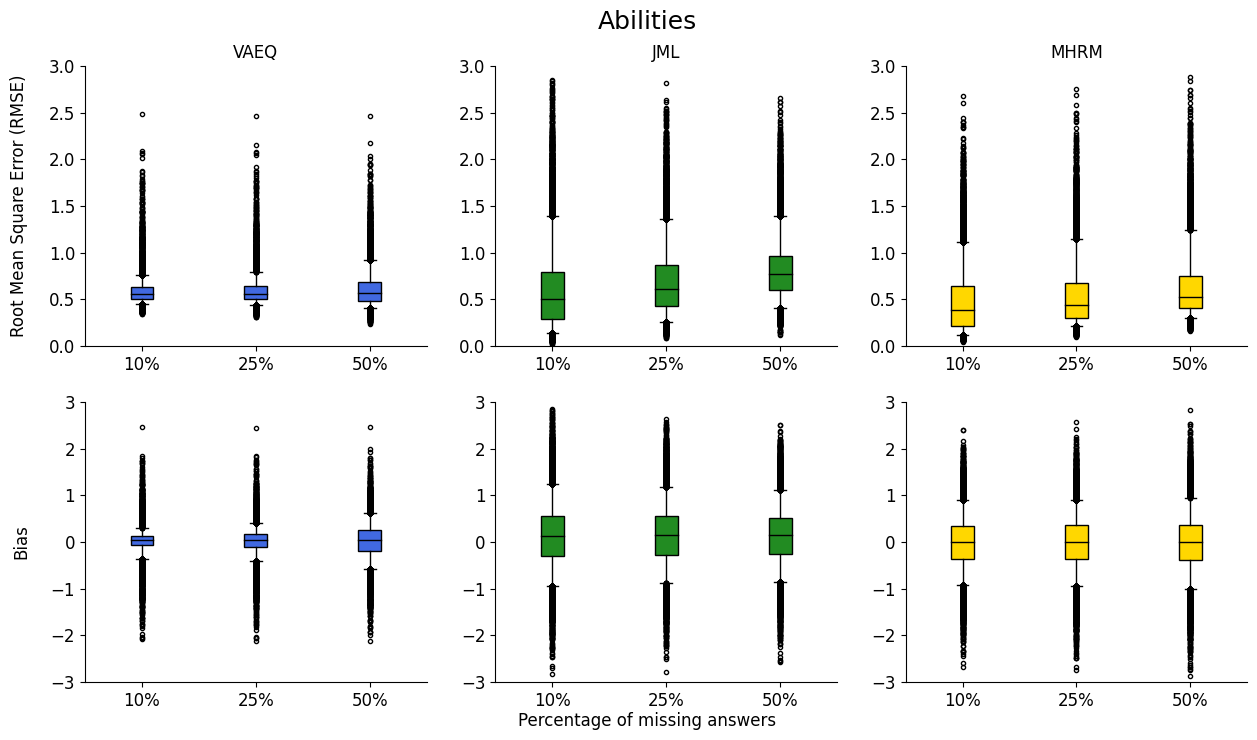

In [28]:
# Reference: https://stackoverflow.com/a/65541965

# Pivot table according to the 'per' categories so that the cap and
# cost variables are grouped by them:
p28_vaeq = theta_df_28.pivot(columns=['per'])
p28_jml = theta_df_28_jml.pivot(columns=['per'])
p28_mhrm = theta_df_28_mhrm.pivot(columns=['per'])

rmse = [p28_vaeq, p28_jml, p28_mhrm]

p28_vaeq = theta_df_28_BIAS.pivot(columns=['per'])
p28_jml = theta_df_28_jml_BIAS.pivot(columns=['per'])
p28_mhrm = theta_df_28_mhrm_BIAS.pivot(columns=['per'])

bias = [p28_vaeq, p28_jml, p28_mhrm]

stats_values = [rmse, bias] 

# Create figure and dictionary containing boxplot parameters that are
# common to both boxplots (according to my style preferences):
# note that I define the whis parameter so that values below the 5th
# percentile and above the 95th percentile are shown as outliers
nb_groups = theta_df_28['per'].nunique()

colors = ['royalblue', 'forestgreen', 'gold']
ylabels = ['Root Mean Square Error (RMSE)', 'Bias']

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

box_param = dict(whis=(5, 95), widths=0.2, patch_artist=True,
                    flierprops=dict(marker='.', markeredgecolor='black',
                    fillstyle=None), medianprops=dict(color='black'))

for i in range(2):
    # Create an array of the 28 and 56 dimansions values for a's (discriminations) 
    # grouped variables to be plotted in each (twinned) boxplot.

    i28_vaeq = [stats_values[i][0]['value'][var].dropna() for var in stats_values[i][0]['value']]
    i28_jml = [stats_values[i][1]['value'][var].dropna() for var in stats_values[i][1]['value']]
    i28_mhrm = [stats_values[i][2]['value'][var].dropna() for var in stats_values[i][2]['value']]  

    # Create boxplots for 'i28' variables: note the double asterisk used
    # to unpack the dictionary of boxplot parameters
    axs[i][0].boxplot(i28_vaeq, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[0]), **box_param)

    axs[i][1].boxplot(i28_jml, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[1]), **box_param)

    axs[i][2].boxplot(i28_mhrm, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[2]), **box_param)

    # Format x ticks
    labelsize = 12
    axs[i][0].set_xticks(np.arange(nb_groups))
    axs[i][0].set_xticklabels([f'{label}%' for label in theta_df_28['per'].unique()])
    axs[i][0].tick_params(axis='x', labelsize=labelsize)

    axs[i][1].set_xticks(np.arange(nb_groups))
    axs[i][1].set_xticklabels([f'{label}%' for label in theta_df_28['per'].unique()])
    axs[i][1].tick_params(axis='x', labelsize=labelsize)

    axs[i][2].set_xticks(np.arange(nb_groups))
    axs[i][2].set_xticklabels([f'{label}%' for label in theta_df_28['per'].unique()])
    axs[i][2].tick_params(axis='x', labelsize=labelsize)

    # Format y ticks
    yticks_fmt = dict(axis='y', labelsize=labelsize)
    axs[i][0].tick_params(**yticks_fmt)
    axs[i][1].tick_params(**yticks_fmt)
    axs[i][2].tick_params(**yticks_fmt)

    # Format axes labels
    xmin_vaeq = np.floor(np.min(i28_vaeq))
    xmin_jml = np.floor(np.min(i28_jml))
    xmin_mhrm = np.floor(np.min(i28_mhrm))
    xmax_vaeq = np.ceil(np.max(i28_vaeq))
    xmax_jml = np.ceil(np.max(i28_jml))
    xmax_mhrm = np.ceil(np.max(i28_mhrm))

    label_fmt = dict(size=12, labelpad=15)
    axs[i][0].spines['top'].set_visible(False)
    axs[i][0].spines['right'].set_visible(False)
    axs[i][0].set_ylim([xmin_vaeq, xmax_vaeq])

    axs[i][1].spines['top'].set_visible(False)
    axs[i][1].spines['right'].set_visible(False)
    axs[i][1].set_ylim([xmin_jml, xmax_jml])

    axs[i][2].spines['top'].set_visible(False)
    axs[i][2].spines['right'].set_visible(False)
    axs[i][2].set_ylim([xmin_mhrm, xmax_mhrm])

    axs[i][0].set_ylabel(ylabels[i], **label_fmt)

axs[0][0].set_title('VAEQ')
axs[0][1].set_title('JML')
axs[0][2].set_title('MHRM')
fig.suptitle('Abilities', y=0.95, size=18)

fig.supxlabel(
    'Percentage of missing answers', 
    y=0.05, 
    fontsize=12)

plt.show()

# Boxplot 90x21

In [29]:
# Discriminations
a_10x90 = pd.read_csv('21 dimensions/90 items/output_data/10_missing/a/a_results.csv', sep=';', header=0)
a_25x90 = pd.read_csv('21 dimensions/90 items/output_data/25_missing/a/a_results.csv', sep=';', header=0)
a_50x90 = pd.read_csv('21 dimensions/90 items/output_data/50_missing/a/a_results.csv', sep=';', header=0)

a_10x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/10_missing/a/a_results.csv', sep=';', header=0)
a_25x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/25_missing/a/a_results.csv', sep=';', header=0)
a_50x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/50_missing/a/a_results.csv', sep=';', header=0)

a_10x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/10_missing/a/a_results.csv', sep=';', header=0)
a_25x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/25_missing/a/a_results.csv', sep=';', header=0)
a_50x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/50_missing/a/a_results.csv', sep=';', header=0)

# Difficulties
b_10x90 = pd.read_csv('21 dimensions/90 items/output_data/10_missing/b/b_results.csv', sep=';', header=0)
b_25x90 = pd.read_csv('21 dimensions/90 items/output_data/25_missing/b/b_results.csv', sep=';', header=0)
b_50x90 = pd.read_csv('21 dimensions/90 items/output_data/50_missing/b/b_results.csv', sep=';', header=0)

b_10x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/10_missing/b/b_results.csv', sep=';', header=0)
b_25x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/25_missing/b/b_results.csv', sep=';', header=0)
b_50x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/50_missing/b/b_results.csv', sep=';', header=0)

b_10x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/10_missing/b/b_results.csv', sep=';', header=0)
b_25x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/25_missing/b/b_results.csv', sep=';', header=0)
b_50x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/50_missing/b/b_results.csv', sep=';', header=0)

# Abilities
theta_10x90 = pd.read_csv('21 dimensions/90 items/output_data/10_missing/theta/theta_results.csv', sep=';', header=0)
theta_25x90 = pd.read_csv('21 dimensions/90 items/output_data/25_missing/theta/theta_results.csv', sep=';', header=0)
theta_50x90 = pd.read_csv('21 dimensions/90 items/output_data/50_missing/theta/theta_results.csv', sep=';', header=0)

theta_10x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/10_missing/theta/theta_results.csv', sep=';', header=0)
theta_25x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/25_missing/theta/theta_results.csv', sep=';', header=0)
theta_50x90_jml = pd.read_csv('21 dimensions/90 items/output_data_jml/50_missing/theta/theta_results.csv', sep=';', header=0)

theta_10x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/10_missing/theta/theta_results.csv', sep=';', header=0)
theta_25x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/25_missing/theta/theta_results.csv', sep=';', header=0)
theta_50x90_mhrm = pd.read_csv('21 dimensions/90 items/output_data_mhrm/50_missing/theta/theta_results.csv', sep=';', header=0)


In [30]:
# Discriminations
l1 = []
l1.extend(a_10x90['RMSE'])
l1.extend(a_25x90['RMSE'])
l1.extend(a_50x90['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [150, 150, 150]),
            value = np.array(l1))

a_df_90 = pd.DataFrame(data)

l1 = []
l1.extend(a_10x90['Bias'])
l1.extend(a_25x90['Bias'])
l1.extend(a_50x90['Bias'])

data = dict(per = np.repeat([10, 25, 50], [150, 150, 150]),
            value = np.array(l1))

a_df_90_BIAS = pd.DataFrame(data)

l1 = []
l1.extend(a_10x90_jml['RMSE'])
l1.extend(a_25x90_jml['RMSE'])
l1.extend(a_50x90_jml['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [150, 150, 150]),
            value = np.array(l1))

a_df_90_jml = pd.DataFrame(data)

l1 = []
l1.extend(a_10x90_jml['Bias'])
l1.extend(a_25x90_jml['Bias'])
l1.extend(a_50x90_jml['Bias'])

data = dict(per = np.repeat([10, 25, 50], [150, 150, 150]),
            value = np.array(l1))

a_df_90_jml_BIAS = pd.DataFrame(data)

l1 = []
l1.extend(a_10x90_mhrm['RMSE'])
l1.extend(a_25x90_mhrm['RMSE'])
l1.extend(a_50x90_mhrm['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [150, 150, 150]),
            value = np.array(l1))

a_df_90_mhrm = pd.DataFrame(data)

l1 = []
l1.extend(a_10x90_mhrm['Bias'])
l1.extend(a_25x90_mhrm['Bias'])
l1.extend(a_50x90_mhrm['Bias'])

data = dict(per = np.repeat([10, 25, 50], [150, 150, 150]),
            value = np.array(l1))

a_df_90_mhrm_BIAS = pd.DataFrame(data)

# Difficulties
l1 = []
l1.extend(b_10x90['RMSE'])
l1.extend(b_25x90['RMSE'])
l1.extend(b_50x90['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [90, 90, 90]),
            value = np.array(l1))

b_df_90 = pd.DataFrame(data)

l1 = []
l1.extend(b_10x90['Bias'])
l1.extend(b_25x90['Bias'])
l1.extend(b_50x90['Bias'])

data = dict(per = np.repeat([10, 25, 50], [90, 90, 90]),
            value = np.array(l1))

b_df_90_BIAS = pd.DataFrame(data)

l1 = []
l1.extend(b_10x90_jml['RMSE'])
l1.extend(b_25x90_jml['RMSE'])
l1.extend(b_50x90_jml['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [90, 90, 90]),
            value = np.array(l1))

b_df_90_jml = pd.DataFrame(data)

l1 = []
l1.extend(b_10x90_jml['Bias'])
l1.extend(b_25x90_jml['Bias'])
l1.extend(b_50x90_jml['Bias'])

data = dict(per = np.repeat([10, 25, 50], [90, 90, 90]),
            value = np.array(l1))

b_df_90_jml_BIAS = pd.DataFrame(data)

l1 = []
l1.extend(b_10x90_mhrm['RMSE'])
l1.extend(b_25x90_mhrm['RMSE'])
l1.extend(b_50x90_mhrm['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [90, 90, 90]),
            value = np.array(l1))

b_df_90_mhrm = pd.DataFrame(data)

l1 = []
l1.extend(b_10x90_mhrm['Bias'])
l1.extend(b_25x90_mhrm['Bias'])
l1.extend(b_50x90_mhrm['Bias'])

data = dict(per = np.repeat([10, 25, 50], [90, 90, 90]),
            value = np.array(l1))

b_df_90_mhrm_BIAS = pd.DataFrame(data)

# Abilities
l1 = []
l1.extend(theta_10x90['RMSE'])
l1.extend(theta_25x90['RMSE'])
l1.extend(theta_50x90['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [168000, 168000, 168000]),
            value = np.array(l1))

theta_df_90 = pd.DataFrame(data)

l1 = []
l1.extend(theta_10x90['Bias'])
l1.extend(theta_25x90['Bias'])
l1.extend(theta_50x90['Bias'])

data = dict(per = np.repeat([10, 25, 50], [168000, 168000, 168000]),
            value = np.array(l1))

theta_df_90_BIAS = pd.DataFrame(data)

l1 = []
l1.extend(theta_10x90_jml['RMSE'])
l1.extend(theta_25x90_jml['RMSE'])
l1.extend(theta_50x90_jml['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [168000, 168000, 168000]),
            value = np.array(l1))

theta_df_90_jml = pd.DataFrame(data)

l1 = []
l1.extend(theta_10x90_jml['Bias'])
l1.extend(theta_25x90_jml['Bias'])
l1.extend(theta_50x90_jml['Bias'])

data = dict(per = np.repeat([10, 25, 50], [168000, 168000, 168000]),
            value = np.array(l1))

theta_df_90_jml_BIAS = pd.DataFrame(data)

l1 = []
l1.extend(theta_10x90_mhrm['RMSE'])
l1.extend(theta_25x90_mhrm['RMSE'])
l1.extend(theta_50x90_mhrm['RMSE'])

data = dict(per = np.repeat([10, 25, 50], [168000, 168000, 168000]),
            value = np.array(l1))

theta_df_90_mhrm = pd.DataFrame(data)

l1 = []
l1.extend(theta_10x90_mhrm['Bias'])
l1.extend(theta_25x90_mhrm['Bias'])
l1.extend(theta_50x90_mhrm['Bias'])

data = dict(per = np.repeat([10, 25, 50], [168000, 168000, 168000]),
            value = np.array(l1))

theta_df_90_mhrm_BIAS = pd.DataFrame(data)

## Discriminations 90x21

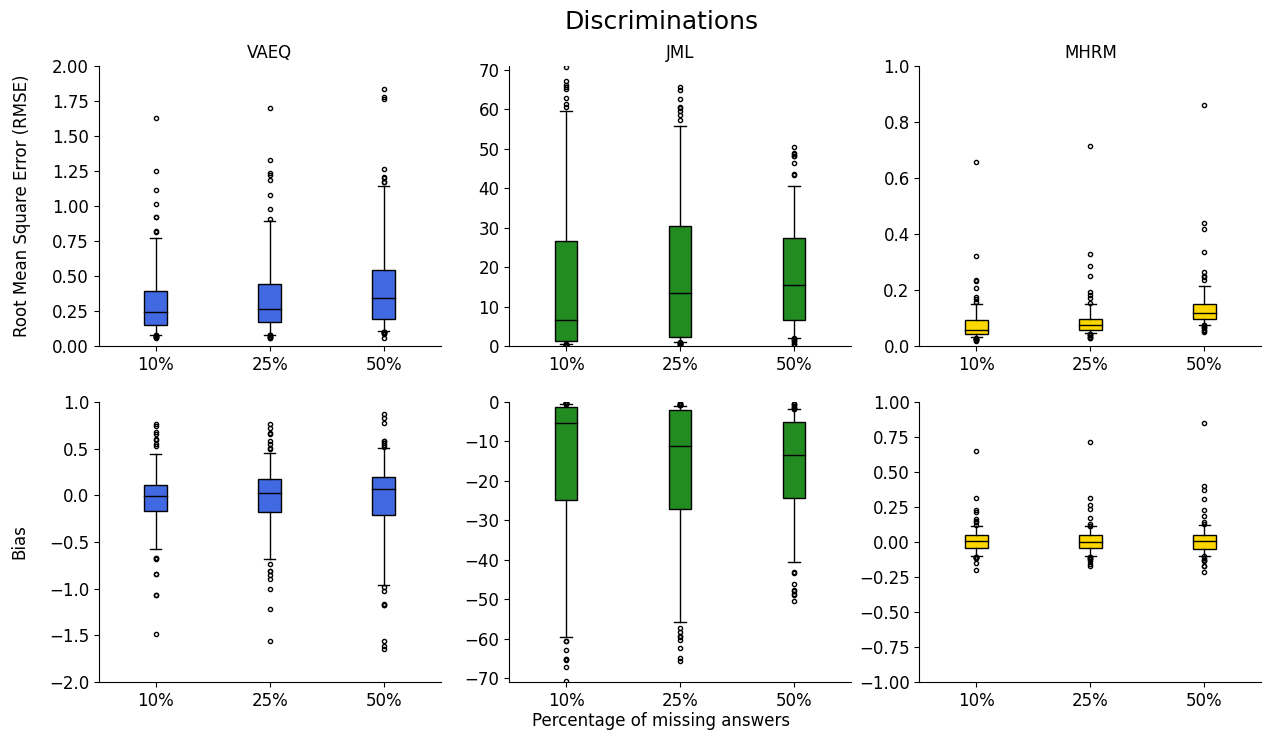

In [31]:
# Reference: https://stackoverflow.com/a/65541965

# Pivot table according to the 'per' categories so that the cap and
# cost variables are grouped by them:
p90_vaeq = a_df_90.pivot(columns=['per'])
p90_jml = a_df_90_jml.pivot(columns=['per'])
p90_mhrm = a_df_90_mhrm.pivot(columns=['per'])

rmse = [p90_vaeq, p90_jml, p90_mhrm]

p90_vaeq = a_df_90_BIAS.pivot(columns=['per'])
p90_jml = a_df_90_jml_BIAS.pivot(columns=['per'])
p90_mhrm = a_df_90_mhrm_BIAS.pivot(columns=['per'])

bias = [p90_vaeq, p90_jml, p90_mhrm]

stats_values = [rmse, bias] 

# Create figure and dictionary containing boxplot parameters that are
# common to both boxplots (according to my style preferences):
# note that I define the whis parameter so that values below the 5th
# percentile and above the 95th percentile are shown as outliers
nb_groups = a_df_90['per'].nunique()

colors = ['royalblue', 'forestgreen', 'gold']
ylabels = ['Root Mean Square Error (RMSE)', 'Bias']

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

box_param = dict(whis=(5, 95), widths=0.2, patch_artist=True,
                    flierprops=dict(marker='.', markeredgecolor='black',
                    fillstyle=None), medianprops=dict(color='black'))

for i in range(2):
    # Create an array of the 90 and 56 dimansions values for a's (discriminations) 
    # grouped variables to be plotted in each (twinned) boxplot.

    i90_vaeq = [stats_values[i][0]['value'][var].dropna() for var in stats_values[i][0]['value']]
    i90_jml = [stats_values[i][1]['value'][var].dropna() for var in stats_values[i][1]['value']]
    i90_mhrm = [stats_values[i][2]['value'][var].dropna() for var in stats_values[i][2]['value']]  

    # Create boxplots for 'i90' variables: note the double asterisk used
    # to unpack the dictionary of boxplot parameters
    axs[i][0].boxplot(i90_vaeq, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[0]), **box_param)

    axs[i][1].boxplot(i90_jml, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[1]), **box_param)

    axs[i][2].boxplot(i90_mhrm, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[2]), **box_param)

    # Format x ticks
    labelsize = 12
    axs[i][0].set_xticks(np.arange(nb_groups))
    axs[i][0].set_xticklabels([f'{label}%' for label in a_df_90['per'].unique()])
    axs[i][0].tick_params(axis='x', labelsize=labelsize)

    axs[i][1].set_xticks(np.arange(nb_groups))
    axs[i][1].set_xticklabels([f'{label}%' for label in a_df_90['per'].unique()])
    axs[i][1].tick_params(axis='x', labelsize=labelsize)

    axs[i][2].set_xticks(np.arange(nb_groups))
    axs[i][2].set_xticklabels([f'{label}%' for label in a_df_90['per'].unique()])
    axs[i][2].tick_params(axis='x', labelsize=labelsize)

    # Format y ticks
    yticks_fmt = dict(axis='y', labelsize=labelsize)
    axs[i][0].tick_params(**yticks_fmt)
    axs[i][1].tick_params(**yticks_fmt)
    axs[i][2].tick_params(**yticks_fmt)

    # Format axes labels
    xmin_vaeq = np.floor(np.min(i90_vaeq))
    xmin_jml = np.floor(np.min(i90_jml))
    xmin_mhrm = np.floor(np.min(i90_mhrm))
    xmax_vaeq = np.ceil(np.max(i90_vaeq))
    xmax_jml = np.ceil(np.max(i90_jml))
    xmax_mhrm = np.ceil(np.max(i90_mhrm))

    label_fmt = dict(size=12, labelpad=15)
    axs[i][0].spines['top'].set_visible(False)
    axs[i][0].spines['right'].set_visible(False)
    axs[i][0].set_ylim([xmin_vaeq, xmax_vaeq])

    axs[i][1].spines['top'].set_visible(False)
    axs[i][1].spines['right'].set_visible(False)
    axs[i][1].set_ylim([xmin_jml, xmax_jml])

    axs[i][2].spines['top'].set_visible(False)
    axs[i][2].spines['right'].set_visible(False)
    axs[i][2].set_ylim([xmin_mhrm, xmax_mhrm])

    axs[i][0].set_ylabel(ylabels[i], **label_fmt)

axs[0][0].set_title('VAEQ')
axs[0][1].set_title('JML')
axs[0][2].set_title('MHRM')
fig.suptitle('Discriminations', y=0.95, size=18)

fig.supxlabel(
    'Percentage of missing answers', 
    y=0.05, 
    fontsize=12)

plt.show()

## Difficulties 90x21

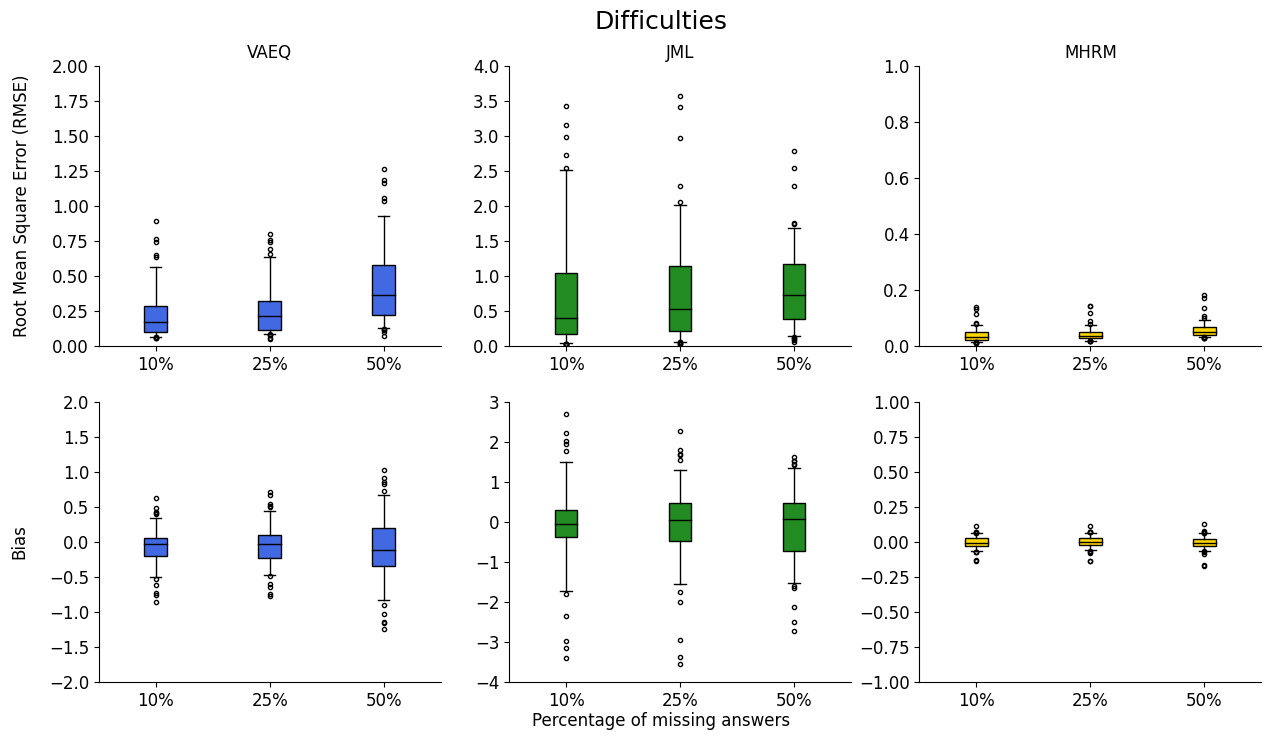

In [32]:
# Reference: https://stackoverflow.com/a/65541965

# Pivot table according to the 'per' categories so that the cap and
# cost variables are grouped by them:
p90_vaeq = b_df_90.pivot(columns=['per'])
p90_jml = b_df_90_jml.pivot(columns=['per'])
p90_mhrm = b_df_90_mhrm.pivot(columns=['per'])

rmse = [p90_vaeq, p90_jml, p90_mhrm]

p90_vaeq = b_df_90_BIAS.pivot(columns=['per'])
p90_jml = b_df_90_jml_BIAS.pivot(columns=['per'])
p90_mhrm = b_df_90_mhrm_BIAS.pivot(columns=['per'])

bias = [p90_vaeq, p90_jml, p90_mhrm]

stats_values = [rmse, bias] 

# Create figure and dictionary containing boxplot parameters that are
# common to both boxplots (according to my style preferences):
# note that I define the whis parameter so that values below the 5th
# percentile and above the 95th percentile are shown as outliers
nb_groups = b_df_90['per'].nunique()

colors = ['royalblue', 'forestgreen', 'gold']
ylabels = ['Root Mean Square Error (RMSE)', 'Bias']

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

box_param = dict(whis=(5, 95), widths=0.2, patch_artist=True,
                    flierprops=dict(marker='.', markeredgecolor='black',
                    fillstyle=None), medianprops=dict(color='black'))

for i in range(2):
    # Create an array of the 90 and 56 dimansions values for a's (discriminations) 
    # grouped variables to be plotted in each (twinned) boxplot.

    i90_vaeq = [stats_values[i][0]['value'][var].dropna() for var in stats_values[i][0]['value']]
    i90_jml = [stats_values[i][1]['value'][var].dropna() for var in stats_values[i][1]['value']]
    i90_mhrm = [stats_values[i][2]['value'][var].dropna() for var in stats_values[i][2]['value']]  

    # Create boxplots for 'i90' variables: note the double asterisk used
    # to unpack the dictionary of boxplot parameters
    axs[i][0].boxplot(i90_vaeq, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[0]), **box_param)

    axs[i][1].boxplot(i90_jml, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[1]), **box_param)

    axs[i][2].boxplot(i90_mhrm, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[2]), **box_param)

    # Format x ticks
    labelsize = 12
    axs[i][0].set_xticks(np.arange(nb_groups))
    axs[i][0].set_xticklabels([f'{label}%' for label in b_df_90['per'].unique()])
    axs[i][0].tick_params(axis='x', labelsize=labelsize)

    axs[i][1].set_xticks(np.arange(nb_groups))
    axs[i][1].set_xticklabels([f'{label}%' for label in b_df_90['per'].unique()])
    axs[i][1].tick_params(axis='x', labelsize=labelsize)

    axs[i][2].set_xticks(np.arange(nb_groups))
    axs[i][2].set_xticklabels([f'{label}%' for label in b_df_90['per'].unique()])
    axs[i][2].tick_params(axis='x', labelsize=labelsize)

    # Format y ticks
    yticks_fmt = dict(axis='y', labelsize=labelsize)
    axs[i][0].tick_params(**yticks_fmt)
    axs[i][1].tick_params(**yticks_fmt)
    axs[i][2].tick_params(**yticks_fmt)

    # Format axes labels
    xmin_vaeq = np.floor(np.min(i90_vaeq))
    xmin_jml = np.floor(np.min(i90_jml))
    xmin_mhrm = np.floor(np.min(i90_mhrm))
    xmax_vaeq = np.ceil(np.max(i90_vaeq))
    xmax_jml = np.ceil(np.max(i90_jml))
    xmax_mhrm = np.ceil(np.max(i90_mhrm))

    label_fmt = dict(size=12, labelpad=15)
    axs[i][0].spines['top'].set_visible(False)
    axs[i][0].spines['right'].set_visible(False)
    axs[i][0].set_ylim([xmin_vaeq, xmax_vaeq])

    axs[i][1].spines['top'].set_visible(False)
    axs[i][1].spines['right'].set_visible(False)
    axs[i][1].set_ylim([xmin_jml, xmax_jml])

    axs[i][2].spines['top'].set_visible(False)
    axs[i][2].spines['right'].set_visible(False)
    axs[i][2].set_ylim([xmin_mhrm, xmax_mhrm])

    axs[i][0].set_ylabel(ylabels[i], **label_fmt)

axs[0][0].set_title('VAEQ')
axs[0][1].set_title('JML')
axs[0][2].set_title('MHRM')
fig.suptitle('Difficulties', y=0.95, size=18)

fig.supxlabel(
    'Percentage of missing answers', 
    y=0.05, 
    fontsize=12)

plt.show()

## Abilities 90x21

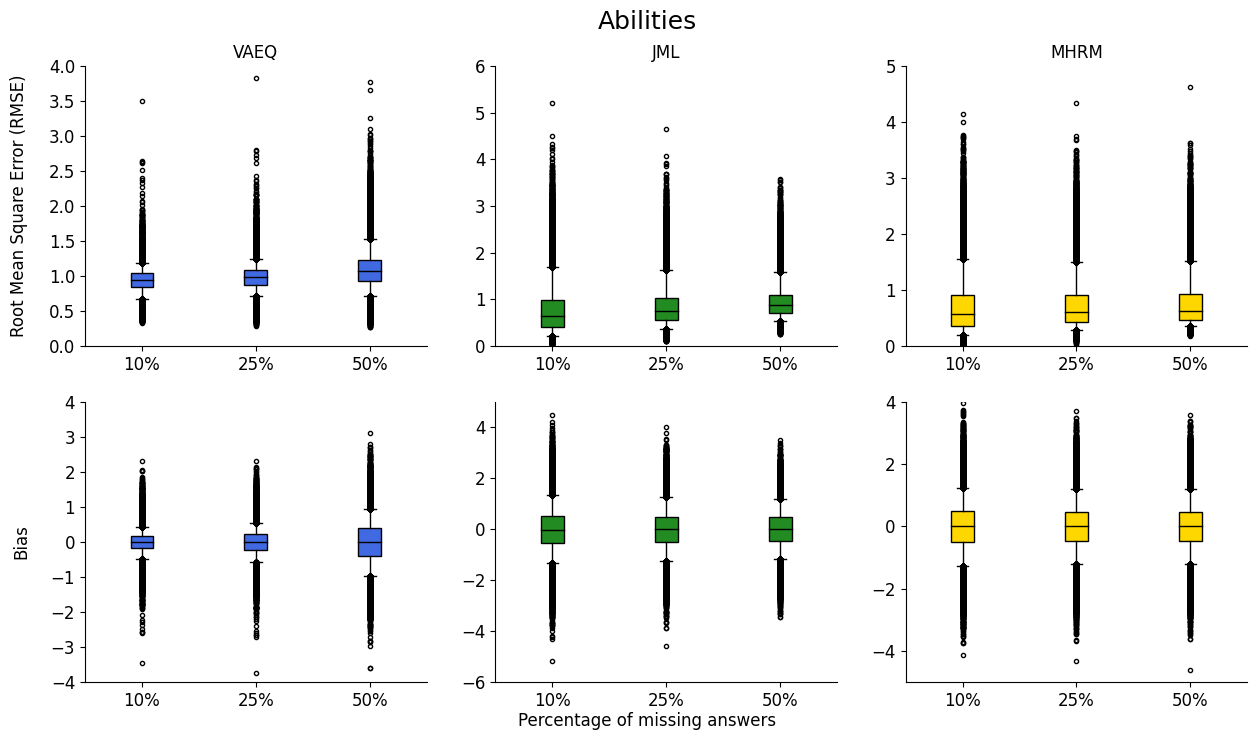

In [33]:
# Reference: https://stackoverflow.com/a/65541965

# Pivot table according to the 'per' categories so that the cap and
# cost variables are grouped by them:
p90_vaeq = theta_df_90.pivot(columns=['per'])
p90_jml = theta_df_90_jml.pivot(columns=['per'])
p90_mhrm = theta_df_90_mhrm.pivot(columns=['per'])

rmse = [p90_vaeq, p90_jml, p90_mhrm]

p90_vaeq = theta_df_90_BIAS.pivot(columns=['per'])
p90_jml = theta_df_90_jml_BIAS.pivot(columns=['per'])
p90_mhrm = theta_df_90_mhrm_BIAS.pivot(columns=['per'])

bias = [p90_vaeq, p90_jml, p90_mhrm]

stats_values = [rmse, bias] 

# Create figure and dictionary containing boxplot parameters that are
# common to both boxplots (according to my style preferences):
# note that I define the whis parameter so that values below the 5th
# percentile and above the 95th percentile are shown as outliers
nb_groups = theta_df_90['per'].nunique()

colors = ['royalblue', 'forestgreen', 'gold']
ylabels = ['Root Mean Square Error (RMSE)', 'Bias']

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

box_param = dict(whis=(5, 95), widths=0.2, patch_artist=True,
                    flierprops=dict(marker='.', markeredgecolor='black',
                    fillstyle=None), medianprops=dict(color='black'))

for i in range(2):
    # Create an array of the 90 and 56 dimansions values for a's (discriminations) 
    # grouped variables to be plotted in each (twinned) boxplot.

    i90_vaeq = [stats_values[i][0]['value'][var].dropna() for var in stats_values[i][0]['value']]
    i90_jml = [stats_values[i][1]['value'][var].dropna() for var in stats_values[i][1]['value']]
    i90_mhrm = [stats_values[i][2]['value'][var].dropna() for var in stats_values[i][2]['value']]  

    # Create boxplots for 'i90' variables: note the double asterisk used
    # to unpack the dictionary of boxplot parameters
    axs[i][0].boxplot(i90_vaeq, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[0]), **box_param)

    axs[i][1].boxplot(i90_jml, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[1]), **box_param)

    axs[i][2].boxplot(i90_mhrm, positions=np.arange(nb_groups),
                boxprops=dict(facecolor=colors[2]), **box_param)

    # Format x ticks
    labelsize = 12
    axs[i][0].set_xticks(np.arange(nb_groups))
    axs[i][0].set_xticklabels([f'{label}%' for label in theta_df_90['per'].unique()])
    axs[i][0].tick_params(axis='x', labelsize=labelsize)

    axs[i][1].set_xticks(np.arange(nb_groups))
    axs[i][1].set_xticklabels([f'{label}%' for label in theta_df_90['per'].unique()])
    axs[i][1].tick_params(axis='x', labelsize=labelsize)

    axs[i][2].set_xticks(np.arange(nb_groups))
    axs[i][2].set_xticklabels([f'{label}%' for label in theta_df_90['per'].unique()])
    axs[i][2].tick_params(axis='x', labelsize=labelsize)

    # Format y ticks
    yticks_fmt = dict(axis='y', labelsize=labelsize)
    axs[i][0].tick_params(**yticks_fmt)
    axs[i][1].tick_params(**yticks_fmt)
    axs[i][2].tick_params(**yticks_fmt)

    # Format axes labels
    xmin_vaeq = np.floor(np.min(i90_vaeq))
    xmin_jml = np.floor(np.min(i90_jml))
    xmin_mhrm = np.floor(np.min(i90_mhrm))
    xmax_vaeq = np.ceil(np.max(i90_vaeq))
    xmax_jml = np.ceil(np.max(i90_jml))
    xmax_mhrm = np.ceil(np.max(i90_mhrm))

    label_fmt = dict(size=12, labelpad=15)
    axs[i][0].spines['top'].set_visible(False)
    axs[i][0].spines['right'].set_visible(False)
    axs[i][0].set_ylim([xmin_vaeq, xmax_vaeq])

    axs[i][1].spines['top'].set_visible(False)
    axs[i][1].spines['right'].set_visible(False)
    axs[i][1].set_ylim([xmin_jml, xmax_jml])

    axs[i][2].spines['top'].set_visible(False)
    axs[i][2].spines['right'].set_visible(False)
    axs[i][2].set_ylim([xmin_mhrm, xmax_mhrm])

    axs[i][0].set_ylabel(ylabels[i], **label_fmt)

axs[0][0].set_title('VAEQ')
axs[0][1].set_title('JML')
axs[0][2].set_title('MHRM')
fig.suptitle('Abilities', y=0.95, size=18)

fig.supxlabel(
    'Percentage of missing answers', 
    y=0.05, 
    fontsize=12)

plt.show()